In [1]:
# Setup: Import all necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

In [3]:
df = pd.read_csv('indonesia_palm_oil_v1_2_2_composite.csv')
df.head()

,year,country_of_production,product_type,forest_500_palm_oil,zero_deforestation_indonesia_palm_oil,province_of_production,kabupaten_of_production,mill,mill_group,refinery,...,total_emission_exposure,gross_emission_luc_exposure,net_emission_luc_exposure,emission_subsidence_exposure,emissions_fire_on_peat_exposure,fob,province_of_production_trase_id,kabupaten_of_production_trase_id,country_of_production_trase_id,country_of_first_import_trase_id
0,2022,INDONESIA,REFINED PALM OIL,NOT ASSESSED,NONE,KALIMANTAN BARAT,SANGGAU,MITRA KARYA SENTOSA,FIRST RESOURCES,INNO-WANGSA OILS & FATS,...,0.008955,0.014051,0.008955,0.0,0.0,39.786345,ID-61,ID-6105,ID,IR
1,2022,INDONESIA,REFINED PALM OIL,NOT ASSESSED,NONE,KALIMANTAN BARAT,SANGGAU,MITRA KARYA SENTOSA,FIRST RESOURCES,INNO-WANGSA OILS & FATS,...,0.061101,0.095874,0.061101,0.0,0.0,164.158328,ID-61,ID-6105,ID,IR
2,2022,INDONESIA,REFINED PALM OIL,NOT ASSESSED,NDPE COMMITMENT,KALIMANTAN BARAT,SANGGAU,MITRA KARYA SENTOSA,FIRST RESOURCES,SARI DUMAI SEJATI (SDS REFINERY),...,3.400835,5.336298,3.400835,0.0,0.0,12318.252864,ID-61,ID-6105,ID,IQ
3,2022,INDONESIA,REFINED PALM OIL,NOT ASSESSED,NONE,KALIMANTAN BARAT,SANGGAU,MITRA KARYA SENTOSA,FIRST RESOURCES,BATARA ELOK SEMESTA TERPADU,...,0.005881,0.009228,0.005881,0.0,0.0,24.887918,ID-61,ID-6105,ID,IL
4,2022,INDONESIA,REFINED PALM OIL,NOT ASSESSED,NONE,KALIMANTAN BARAT,SANGGAU,MITRA KARYA SENTOSA,FIRST RESOURCES,BERKAH EMAS SUMBER TERANG,...,0.011412,0.017907,0.011412,0.0,0.0,31.551004,ID-61,ID-6105,ID,IL


In [4]:
df = df.drop_duplicates()

In [5]:
df.describe()

,year,volume,oil_palm_ha,palm_oil_deforestation_10_year_total_exposure,palm_oil_deforestation_annual_exposure,total_emission_exposure,gross_emission_luc_exposure,net_emission_luc_exposure,emission_subsidence_exposure,emissions_fire_on_peat_exposure,fob
count,8.147633e+06,8.147633e+06,8.137398e+06,8.137398e+06,8.137398e+06,6.374262e+06,6.374262e+06,6.374262e+06,6.374262e+06,6.374262e+06,8.136331e+06
mean,2.020996e+03,4.708557e+01,9.806856e+00,8.716492e-01,2.104827e-02,5.070008e+01,7.331553e+00,2.821122e+00,4.614057e+01,1.738393e+00,1.449042e+04
std,1.133292e+00,6.881367e+03,5.091932e+02,8.148529e+01,4.123585e+00,6.422537e+03,1.268562e+03,6.556111e+02,5.988977e+03,7.051506e+02,2.306529e+05
min,2.013000e+03,2.088572e-14,0.000000e+00,0.000000e+00,0.000000e+00,-3.177224e+04,0.000000e+00,-2.258488e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.021000e+03,2.703648e-03,1.000769e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.755487e+00
50%,2.021000e+03,5.052519e-02,1.850183e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.060123e+01
75%,2.022000e+03,8.424152e-01,2.999293e-01,6.125459e-04,0.000000e+00,2.516116e-02,0.000000e+00,0.000000e+00,4.047388e-03,0.000000e+00,6.746051e+02
max,2.022000e+03,1.160522e+07,1.996979e+05,5.178821e+04,3.772783e+03,4.408673e+06,1.279762e+06,8.396866e+05,4.402719e+06,1.119979e+06,1.134031e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8147633 entries, 0 to 8147928
Data columns (total 32 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   year                                           int64  
 1   country_of_production                          object 
 2   product_type                                   object 
 3   forest_500_palm_oil                            object 
 4   zero_deforestation_indonesia_palm_oil          object 
 5   province_of_production                         object 
 6   kabupaten_of_production                        object 
 7   mill                                           object 
 8   mill_group                                     object 
 9   refinery                                       object 
 10  refinery_group                                 object 
 11  exporter                                       object 
 12  exporter_group                                 

In [7]:
df.isnull().sum()

year                                                   0
country_of_production                                  0
product_type                                           0
forest_500_palm_oil                                    0
zero_deforestation_indonesia_palm_oil                  0
province_of_production                                 0
kabupaten_of_production                                0
mill                                                   0
mill_group                                             0
refinery                                               0
refinery_group                                         0
exporter                                               0
exporter_group                                         0
port_of_export                                         0
importer                                               0
importer_group                                         0
country_of_first_import                                0
economic_bloc                  

In [8]:
len(df)

8147633

In [9]:
print(df[df['total_emission_exposure'].isnull()]['year'].value_counts())


year
2020    786384
2019    542026
2018    434726
2016      2214
2013      2096
2014      2056
2015      2038
2017      1831
Name: count, dtype: int64


In [10]:
print(df[df['total_emission_exposure'].isnull()]['province_of_production'].value_counts())

province_of_production
SUMATERA UTARA          360856
RIAU                    259378
KALIMANTAN TENGAH       171337
KALIMANTAN BARAT        151827
ACEH                    101231
JAMBI                   100593
KALIMANTAN TIMUR        100306
SUMATERA SELATAN         99850
KALIMANTAN SELATAN       71426
SUMATERA BARAT           46120
LAMPUNG                  38702
BENGKULU                 33182
SULAWESI TENGAH          31288
PAPUA                    30768
KEP. BANGKA BELITUNG     28283
PAPUA BARAT              25786
SULAWESI TENGGARA        22593
KALIMANTAN UTARA         19903
JAWA BARAT               18585
SULAWESI BARAT           18297
SULAWESI SELATAN         14926
UNKNOWN                  10235
GORONTALO                 8412
BANTEN                    4384
MALUKU                    4116
KEP. RIAU                  987
Name: count, dtype: int64


In [11]:
# Define the reliable years
reliable_years = [2013, 2014, 2015, 2016, 2017, 2021, 2022]

# Create the final DataFrame for analysis
df_reliable = df[df['year'].isin(reliable_years)].copy()

# Clean any remaining nulls from this reliable set
df_reliable.dropna(subset=['total_emission_exposure'], inplace=True)

In [12]:
df_reliable.isnull().sum()

year                                                0
country_of_production                               0
product_type                                        0
forest_500_palm_oil                                 0
zero_deforestation_indonesia_palm_oil               0
province_of_production                              0
kabupaten_of_production                             0
mill                                                0
mill_group                                          0
refinery                                            0
refinery_group                                      0
exporter                                            0
exporter_group                                      0
port_of_export                                      0
importer                                            0
importer_group                                      0
country_of_first_import                             0
economic_bloc                                       0
volume                      

In [13]:
df.columns

Index(['year', 'country_of_production', 'product_type', 'forest_500_palm_oil',
       'zero_deforestation_indonesia_palm_oil', 'province_of_production',
       'kabupaten_of_production', 'mill', 'mill_group', 'refinery',
       'refinery_group', 'exporter', 'exporter_group', 'port_of_export',
       'importer', 'importer_group', 'country_of_first_import',
       'economic_bloc', 'volume', 'oil_palm_ha',
       'palm_oil_deforestation_10_year_total_exposure',
       'palm_oil_deforestation_annual_exposure', 'total_emission_exposure',
       'gross_emission_luc_exposure', 'net_emission_luc_exposure',
       'emission_subsidence_exposure', 'emissions_fire_on_peat_exposure',
       'fob', 'province_of_production_trase_id',
       'kabupaten_of_production_trase_id', 'country_of_production_trase_id',
       'country_of_first_import_trase_id'],
      dtype='object')

In [14]:
needed_columns = [
    # --- Time and Location Identifiers ---
    'year',
    'province_of_production',
    'kabupaten_of_production',
    
    # --- Supply Chain Actor Identifiers ---
    'mill',
    'mill_group',
    'exporter',
    'exporter_group',
    
    # --- Raw Metrics for KPI Creation ---
    'volume',
    'oil_palm_ha',
    'palm_oil_deforestation_annual_exposure',
    'total_emission_exposure',
    
    # --- Other useful columns for the dashboard ---
    'importer',
    'country_of_first_import'
]

# Create a new DataFrame containing only these columns.
# Using .copy() prevents a common Pandas warning later on.
df_cleaned = df_reliable[needed_columns].copy()

# You can now proceed with your analysis using 'df_cleaned'
print("Dataset shape before cleaning:", df_reliable.shape)
print("Dataset shape after cleaning:", df_cleaned.shape)
df_cleaned.head()

Dataset shape before cleaning: (6374262, 32)
Dataset shape after cleaning: (6374262, 13)


,year,province_of_production,kabupaten_of_production,mill,mill_group,exporter,exporter_group,volume,oil_palm_ha,palm_oil_deforestation_annual_exposure,total_emission_exposure,importer,country_of_first_import
0,2022,KALIMANTAN BARAT,SANGGAU,MITRA KARYA SENTOSA,FIRST RESOURCES,INNO-WANGSA OILS & FATS,TANIMAS,0.024855,0.009024,5.475727e-07,0.008955,ICC OILS AND FATS FZC,IRAN
1,2022,KALIMANTAN BARAT,SANGGAU,MITRA KARYA SENTOSA,FIRST RESOURCES,INNO-WANGSA OILS & FATS,TANIMAS,0.169586,0.061572,3.736132e-06,0.061101,KHORSHID BARSAVA SHIPPING & INTERNATIONAL TRAN...,IRAN
2,2022,KALIMANTAN BARAT,SANGGAU,MITRA KARYA SENTOSA,FIRST RESOURCES,SARI DUMAI SEJATI,ROYAL GOLDEN EAGLE,9.439053,3.427065,2.079503e-04,3.400835,AAA OILS & FATS,IRAQ
3,2022,KALIMANTAN BARAT,SANGGAU,MITRA KARYA SENTOSA,FIRST RESOURCES,BATARA ELOK SEMESTA TERPADU,BEST INDUSTRY,0.016323,0.005926,3.596012e-07,0.005881,MIRO TRADE LTD,ISRAEL
4,2022,KALIMANTAN BARAT,SANGGAU,MITRA KARYA SENTOSA,FIRST RESOURCES,BERKAH EMAS SUMBER TERANG,BEST INDUSTRY,0.031675,0.011500,6.978343e-07,0.011412,ICC OILS AND FATS FZC,ISRAEL


In [15]:
len(df[df['year'] == 2018]), len(df[df['year'] == 2019]), len(df[df['year'] == 2020])

(434726, 542026, 786384)

In [16]:
df[df['year'] == 2018]['total_emission_exposure'].isnull().sum()

np.int64(434726)

In [17]:
df[df['year'] == 2021]['total_emission_exposure'].isnull().sum()

np.int64(0)

In [18]:
len(df[df['year'] == 2021])

3169646

In [19]:
len(df[df['year'] == 2022])

3204616

In [20]:
sum =0
for i in range(2013, 2018):
    sum += len(df[df['year'] == i])
sum

10235

In [21]:
# Identify the two years that have data
usable_years = [2021, 2022] # IMPORTANT: Replace with your actual years

# Create a new DataFrame with only the valid data
df_usable = df[df['year'].isin(usable_years)].copy()

# Drop any remaining nulls in critical columns to be safe
df_usable.dropna(subset=['total_emission_exposure', 'volume', 'oil_palm_ha'], inplace=True)

In [22]:
df_usable.isnull().sum()

year                                                0
country_of_production                               0
product_type                                        0
forest_500_palm_oil                                 0
zero_deforestation_indonesia_palm_oil               0
province_of_production                              0
kabupaten_of_production                             0
mill                                                0
mill_group                                          0
refinery                                            0
refinery_group                                      0
exporter                                            0
exporter_group                                      0
port_of_export                                      0
importer                                            0
importer_group                                      0
country_of_first_import                             0
economic_bloc                                       0
volume                      

In [23]:
# Define the reliable years
reliable_years = [2021, 2022]

# Create the final DataFrame for analysis
df_reliable = df[df['year'].isin(reliable_years)].copy()

# Clean any remaining nulls from this reliable set
df_reliable.dropna(subset=['total_emission_exposure'], inplace=True)

In [24]:
usable_years = [2021, 2022] # Assuming these are your valid years
relevant_columns = [
    'year', 'province_of_production', 'mill', 'mill_group', 'exporter_group',
    'volume', 'fob','zero_deforestation_indonesia_palm_oil','oil_palm_ha', 'palm_oil_deforestation_annual_exposure',
    'gross_emission_luc_exposure', 'emission_subsidence_exposure',
    'emissions_fire_on_peat_exposure'
]

# --- Filtering ---
df_clean = df[df['year'].isin(usable_years)][relevant_columns].copy()

print("Initial clean dataset shape:", df_clean.shape)

Initial clean dataset shape: (6374262, 13)


In [25]:
len(df_clean[df_clean['fob']==0])

322708

In [26]:
len(df_clean[df_clean['emission_subsidence_exposure']==0]),len(df_clean[df_clean['emissions_fire_on_peat_exposure']==0])

(4372690, 5932126)

In [27]:
len(df_clean[df_clean['gross_emission_luc_exposure']==0])

5180760

In [28]:
len(df_usable[df_usable['total_emission_exposure']==0]),len(df_clean[df_clean['palm_oil_deforestation_annual_exposure']==0])

(3680989, 5766049)

In [29]:
len(df_clean[df_clean['zero_deforestation_indonesia_palm_oil']=='NONE'])

4597231

In [30]:
len(df_clean[df_clean['volume']>0])

6374262

In [31]:
df_clean = df_clean[df_clean['fob'] != 0]

In [32]:
len(df_clean)

6051554

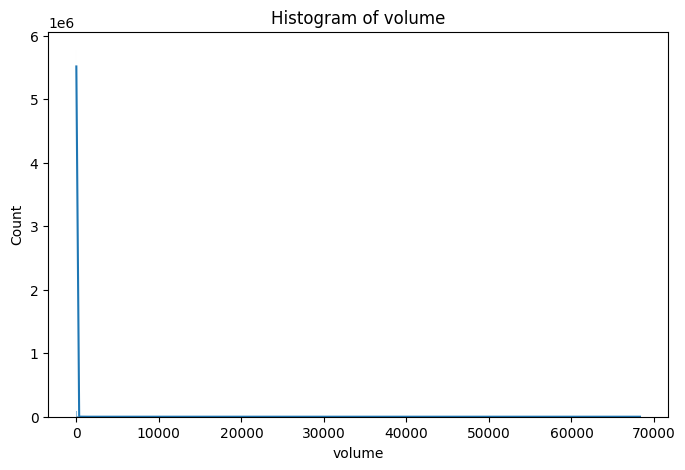

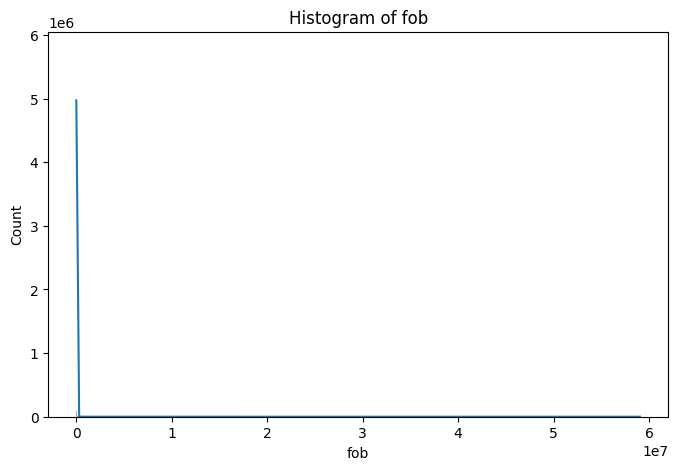

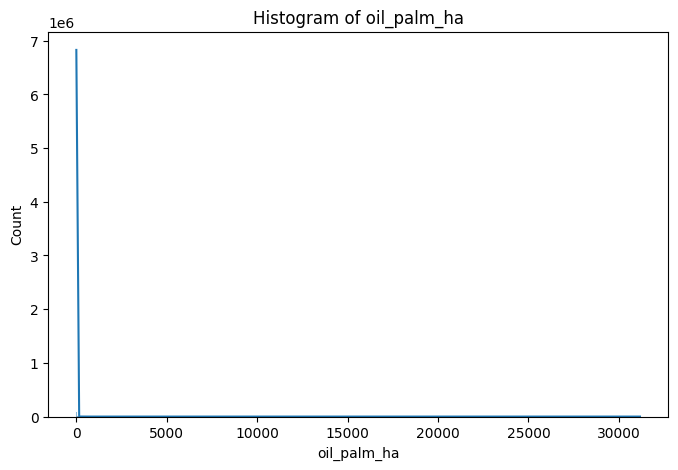

In [33]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
cols = ['volume', 'fob', 'oil_palm_ha']

for col in cols:
    plt.figure(figsize=(8, 5))  # Optional: make plot larger
    sns.histplot(df_clean[col], kde=True)  # Add KDE for distribution shape
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Creating KPIS from raw data

In [34]:
# Make a copy for feature engineering
df_featured = df_clean.copy()

# Handle zeros before division
df_featured['volume'].replace(0, np.nan, inplace=True)
df_featured['oil_palm_ha'].replace(0, np.nan, inplace=True)

# --- Create Human-Readable KPIs ---
df_featured['cost_per_tonne'] = df_featured['fob'] / df_featured['volume']

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# --- Data-Driven Weight Tuning (Method: PCA) ---
# Select the raw emission columns from the cleaned dataframe
emission_cols = [
    'emissions_fire_on_peat_exposure',
    'emission_subsidence_exposure',
    'gross_emission_luc_exposure'
]
emission_data = df_clean[emission_cols]

# 1. Scale the data before applying PCA
# This is crucial because PCA is sensitive to the scale of the variables.
scaler = StandardScaler()
scaled_emission_data = scaler.fit_transform(emission_data)

# 2. Apply PCA to find the principal component that captures the most variance
pca = PCA(n_components=1)
pca.fit(scaled_emission_data)

# 3. Extract the component loadings (these are our weights)
# We use the absolute value because we care about the magnitude of contribution, not the direction on the principal axis.
pca_weights = np.abs(pca.components_[0])

# 4. Normalize the weights to sum to 1 for clarity and direct use
normalized_weights = pca_weights / pca_weights.sum()

# Create the final weights dictionary
data_driven_weights = dict(zip(emission_cols, normalized_weights))

print("PCA-Derived Data-Driven Weights:")
for factor, weight in data_driven_weights.items():
    print(f"- {factor}: {weight:.4f}")

# Use these new, data-driven weights for the calculation
weights = data_driven_weights

# --- Calculate the Weighted Score (this part of your code remains the same) ---
df_featured['weighted_emission_score'] = (
    df_featured.get('emissions_fire_on_peat_exposure', 0) * weights['emissions_fire_on_peat_exposure'] +
    df_featured.get('emission_subsidence_exposure', 0) * weights['emission_subsidence_exposure'] +
    df_featured.get('gross_emission_luc_exposure', 0) * weights['gross_emission_luc_exposure']
)


df_featured['emissions_per_tonne'] = df_featured['weighted_emission_score'] / df_featured['volume']
df_featured['deforestation_per_ha'] = df_featured.get('palm_oil_deforestation_annual_exposure', 0) / df_featured['oil_palm_ha']

# Final cleanup
df_featured.replace([np.inf, -np.inf], np.nan, inplace=True)
df_featured.fillna(0, inplace=True)

print("Human-readable KPIs created successfully.")

C:\Users\karti\AppData\Local\Temp\ipykernel_21264\1536204458.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_featured['volume'].replace(0, np.nan, inplace=True)
C:\Users\karti\AppData\Local\Temp\ipykernel_21264\1536204458.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

PCA-Derived Data-Driven Weights:
- emissions_fire_on_peat_exposure: 0.3501
- emission_subsidence_exposure: 0.4143
- gross_emission_luc_exposure: 0.2356
Human-readable KPIs created successfully.


# EDA

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

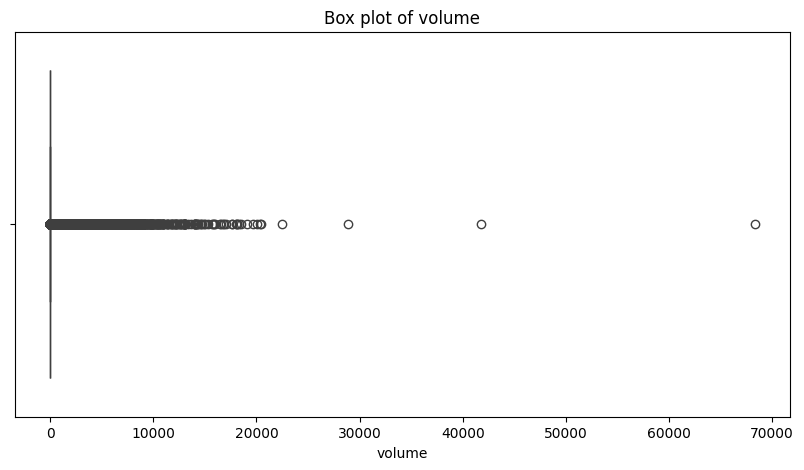

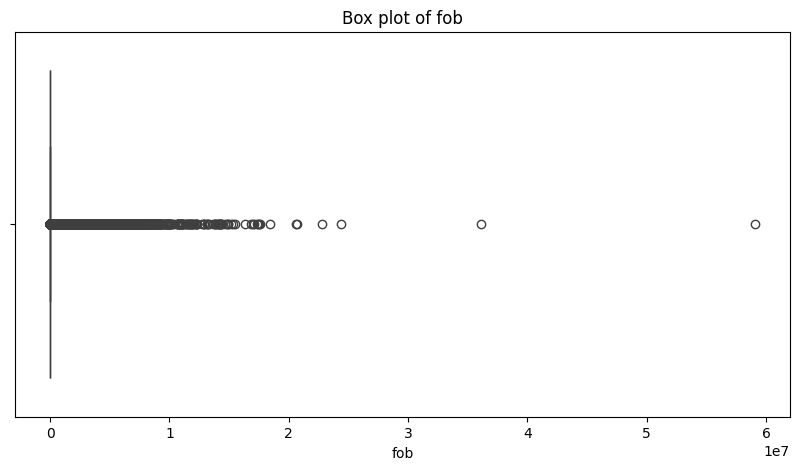

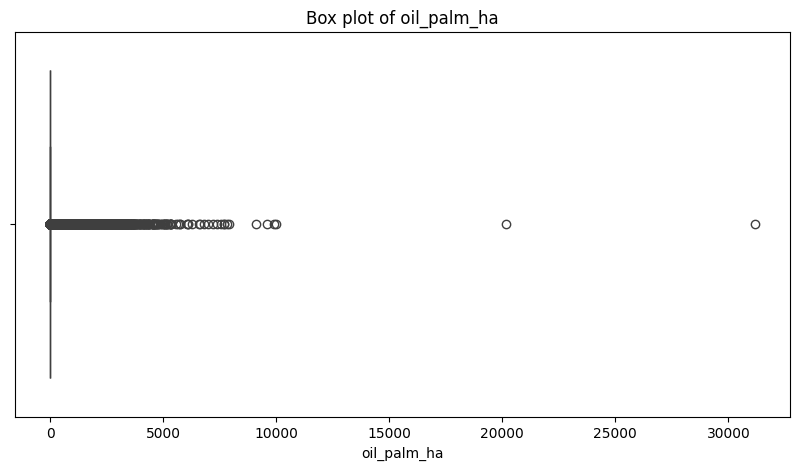

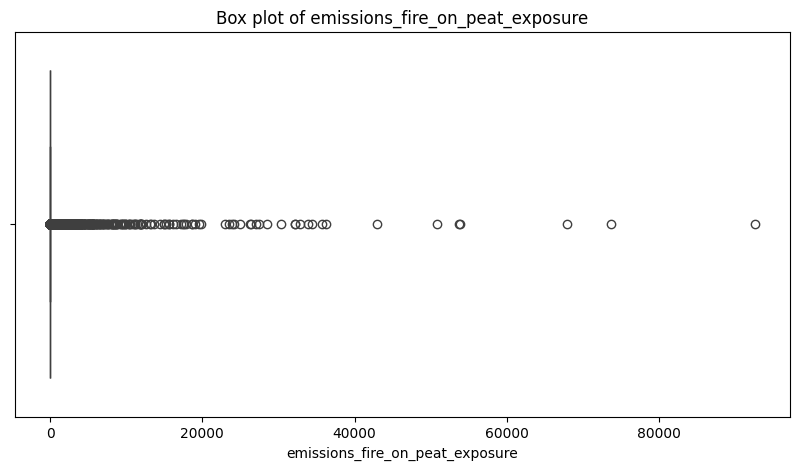

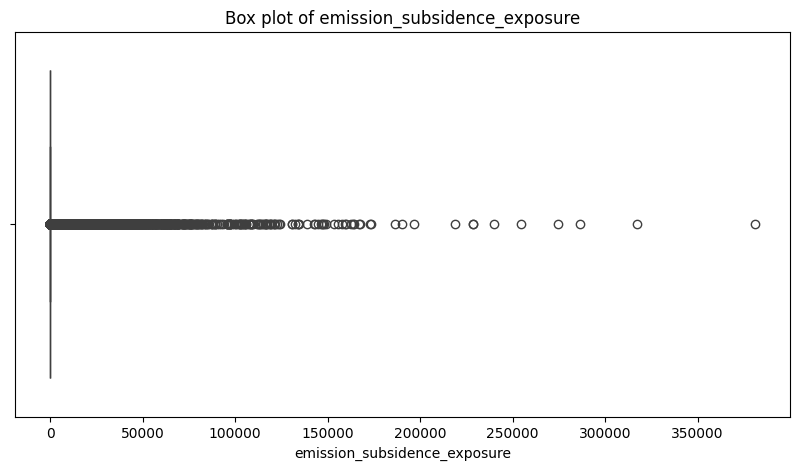

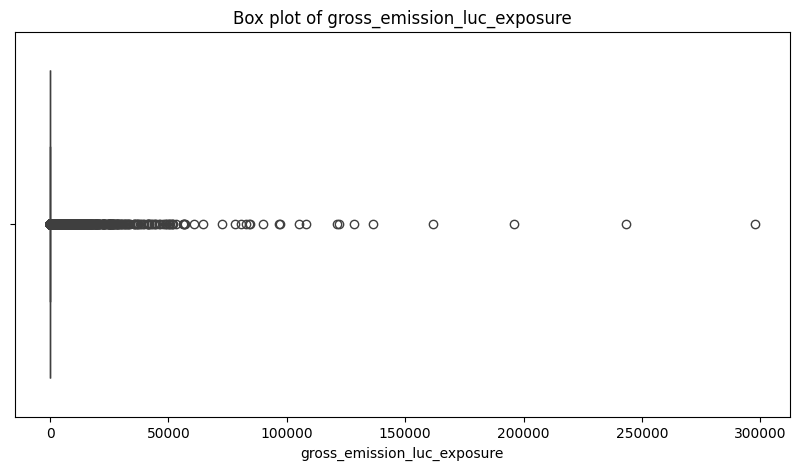

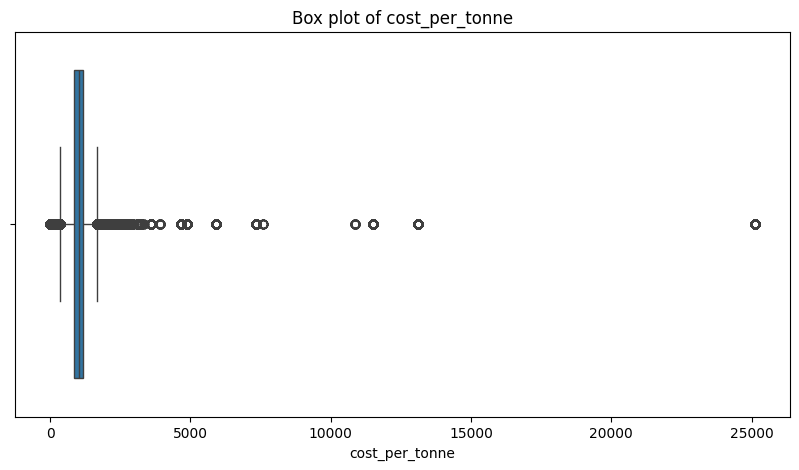

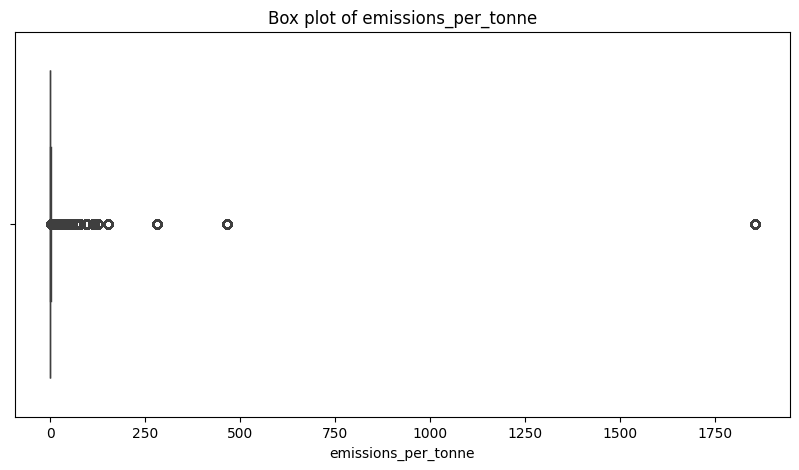

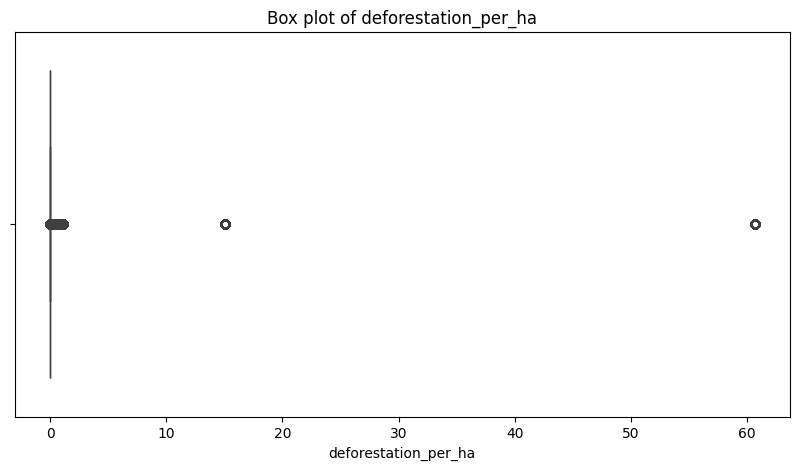

In [36]:
box_columns = ['volume', 'fob', 'oil_palm_ha', 'emissions_fire_on_peat_exposure',
               'emission_subsidence_exposure', 'gross_emission_luc_exposure',
               'cost_per_tonne', 'emissions_per_tonne', 'deforestation_per_ha']
for col in box_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_featured[col])
    plt.title(f'Box plot of {col}')
    plt.show()  

In [37]:
outlier_counts = {}

for col in box_columns:  # numeric cols only
    Q1 = df_featured[col].quantile(0.25)
    Q3 = df_featured[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_featured[(df_featured[col] < lower_bound) | (df_featured[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

# convert to dataframe for nicer view
outlier_summary = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier_Count'])
print(outlier_summary)

                                 Outlier_Count
volume                                 1083353
fob                                    1076726
oil_palm_ha                            1081486
emissions_fire_on_peat_exposure         417945
emission_subsidence_exposure           1392523
gross_emission_luc_exposure            1118292
cost_per_tonne                          450930
emissions_per_tonne                    1052258
deforestation_per_ha                    573606


In [38]:
outlier_percentages = (outlier_summary['Outlier_Count'] / len(df_featured)) * 100
outlier_summary['Outlier_Percentage'] = outlier_percentages.round(2)
print(outlier_summary)


                                 Outlier_Count  Outlier_Percentage
volume                                 1083353               17.90
fob                                    1076726               17.79
oil_palm_ha                            1081486               17.87
emissions_fire_on_peat_exposure         417945                6.91
emission_subsidence_exposure           1392523               23.01
gross_emission_luc_exposure            1118292               18.48
cost_per_tonne                          450930                7.45
emissions_per_tonne                    1052258               17.39
deforestation_per_ha                    573606                9.48


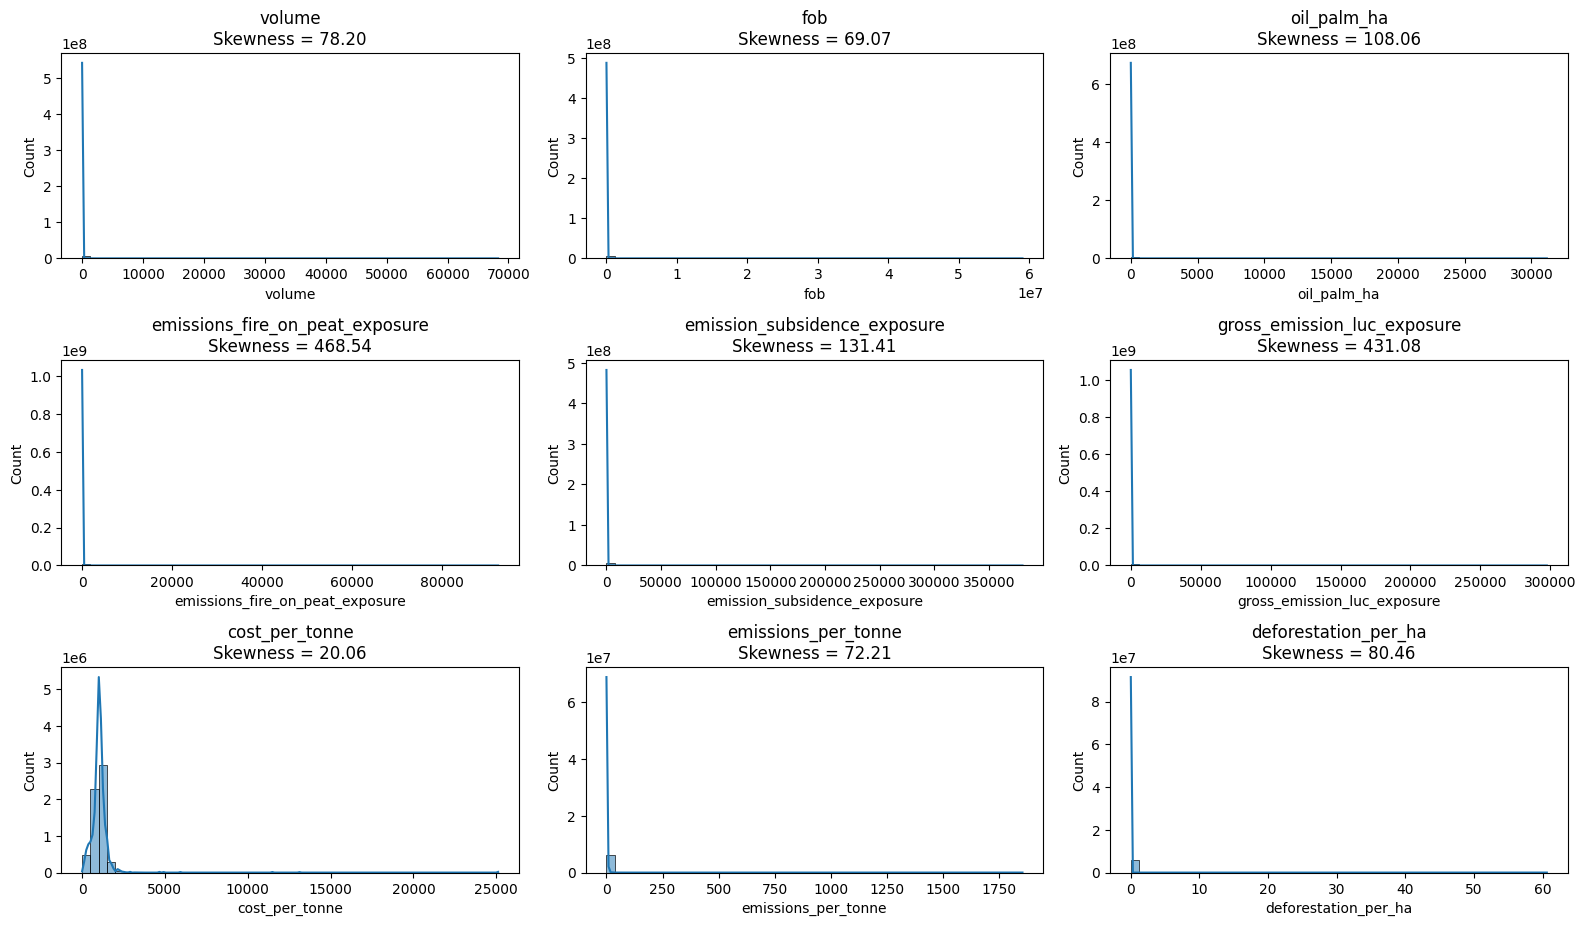

In [39]:

plt.figure(figsize=(16, 12))

for i, col in enumerate(box_columns, 1):
    plt.subplot(len(box_columns) // 3 + 1, 3, i)  # 3 plots per row
    sns.histplot(df_featured[col].dropna(), kde=True, bins=50)
    skew_val = df_featured[col].skew()
    plt.title(f"{col}\nSkewness = {skew_val:.2f}")

plt.tight_layout()
plt.show()

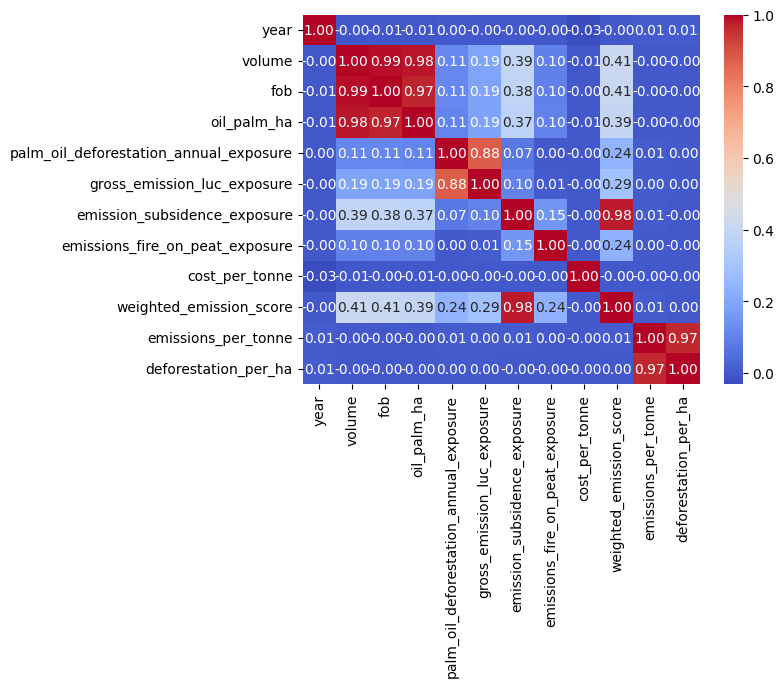

In [40]:
import seaborn as sns
import numpy as np

# Compute correlation only on numeric columns to avoid string-to-float errors
num_df = df_featured.select_dtypes(include=[np.number])
if num_df.empty:
    print("No numeric columns available for correlation heatmap.")
else:
    corr = num_df.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

In [41]:
corr

,year,volume,fob,oil_palm_ha,palm_oil_deforestation_annual_exposure,gross_emission_luc_exposure,emission_subsidence_exposure,emissions_fire_on_peat_exposure,cost_per_tonne,weighted_emission_score,emissions_per_tonne,deforestation_per_ha
year,1.000000,-0.004448,-0.006418,-0.005427,0.000495,-0.001548,-0.001682,-0.000510,-0.031800,-0.001937,0.006765,0.008229
volume,-0.004448,1.000000,0.989898,0.980549,0.110689,0.190777,0.386273,0.095393,-0.007036,0.410628,-0.001812,-0.001033
fob,-0.006418,0.989898,1.000000,0.968811,0.110665,0.188458,0.382497,0.095343,-0.002721,0.406608,-0.001845,-0.001040
oil_palm_ha,-0.005427,0.980549,0.968811,1.000000,0.105081,0.187121,0.368907,0.099871,-0.006873,0.393936,-0.001775,-0.001008
palm_oil_deforestation_annual_exposure,0.000495,0.110689,0.110665,0.105081,1.000000,0.876083,0.074726,0.003158,-0.000866,0.241478,0.005231,0.002778
gross_emission_luc_exposure,-0.001548,0.190777,0.188458,0.187121,0.876083,1.000000,0.097636,0.007087,-0.001390,0.287605,0.004525,0.001941
emission_subsidence_exposure,-0.001682,0.386273,0.382497,0.368907,0.074726,0.097636,1.000000,0.149952,-0.003327,0.976916,0.007707,-0.000372
emissions_fire_on_peat_exposure,-0.000510,0.095393,0.095343,0.099871,0.003158,0.007087,0.149952,1.000000,-0.000801,0.235254,0.002448,-0.000111
cost_per_tonne,-0.031800,-0.007036,-0.002721,-0.006873,-0.000866,-0.001390,-0.003327,-0.000801,1.000000,-0.003485,-0.000048,-0.000186
weighted_emission_score,-0.001937,0.410628,0.406608,0.393936,0.241478,0.287605,0.976916,0.235254,-0.003485,1.000000,0.008383,0.000016


In [42]:
df_log = df_featured.copy()

for col in box_columns:
    df_log[col] = np.log1p(df_log[col])

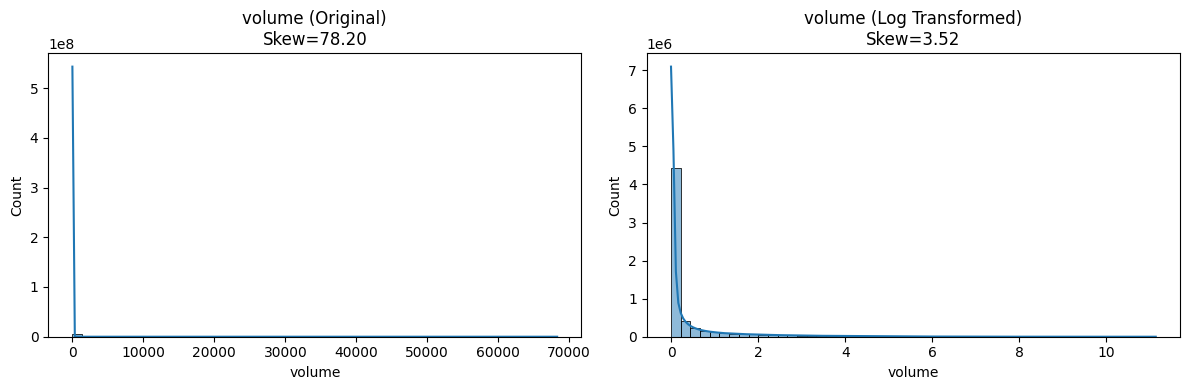

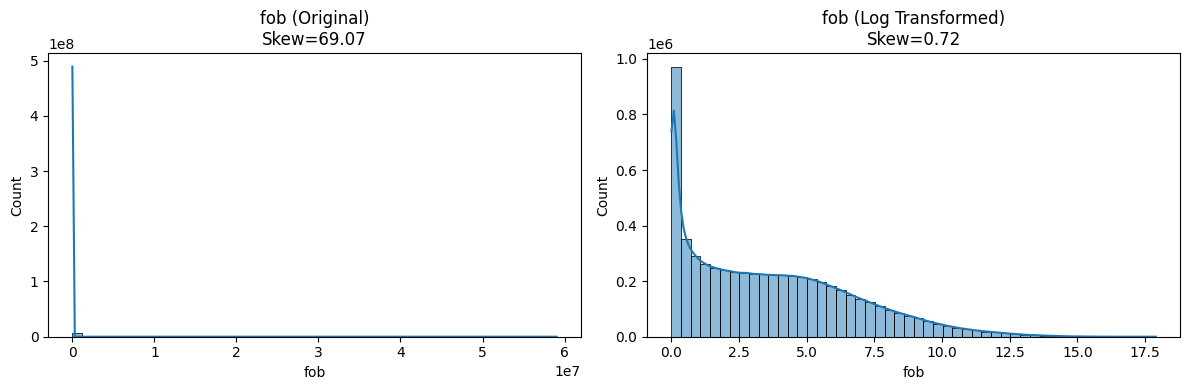

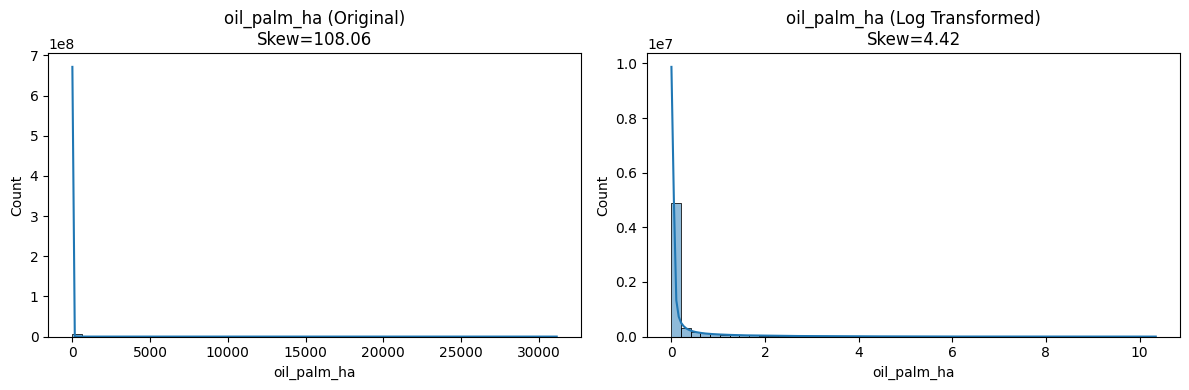

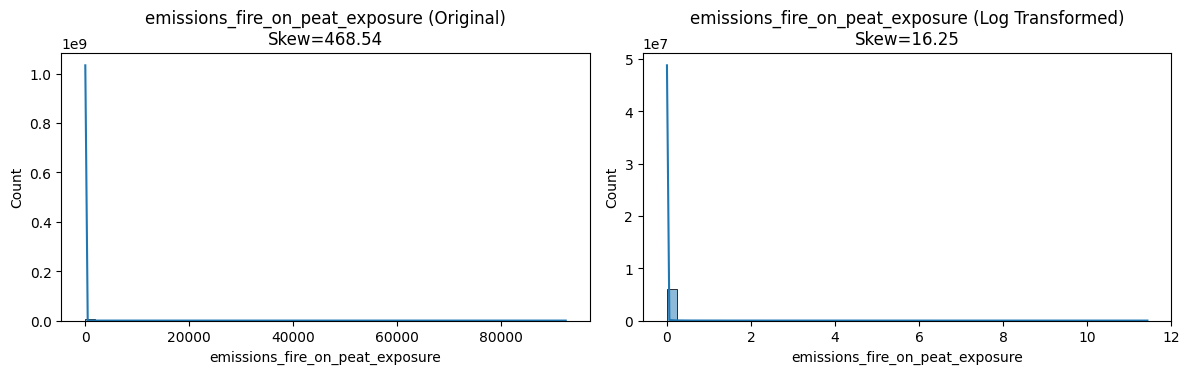

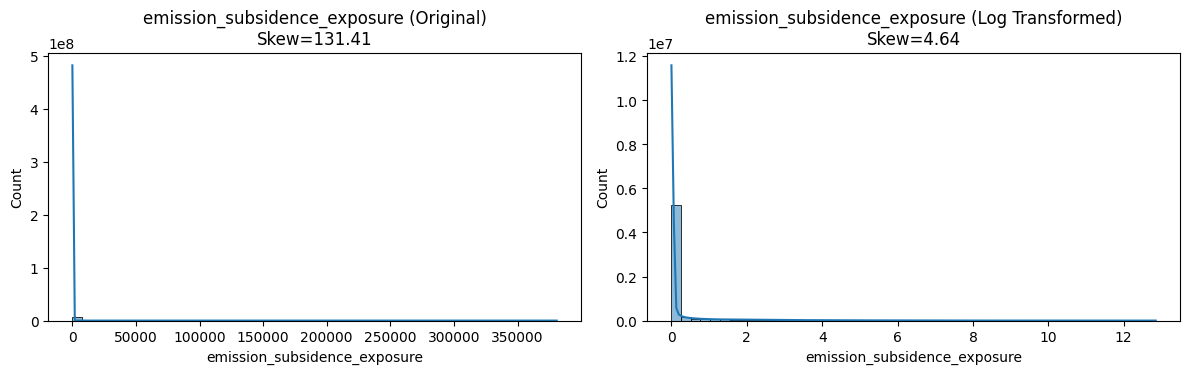

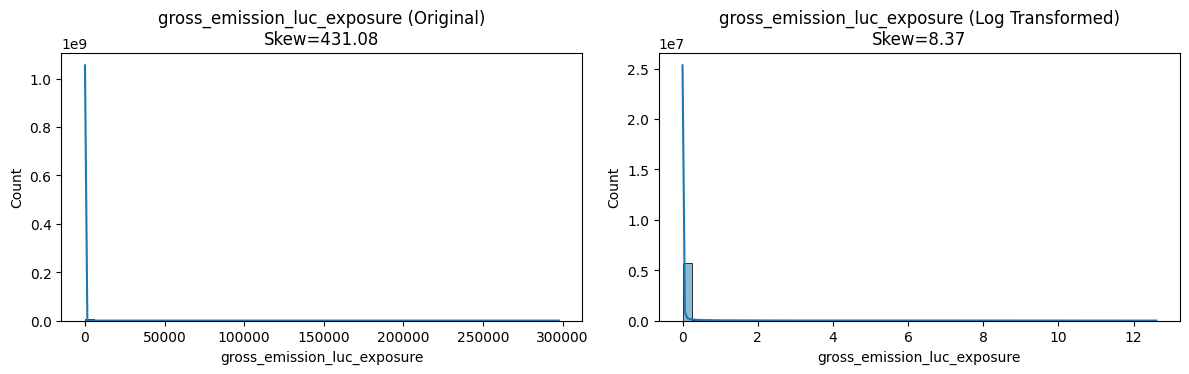

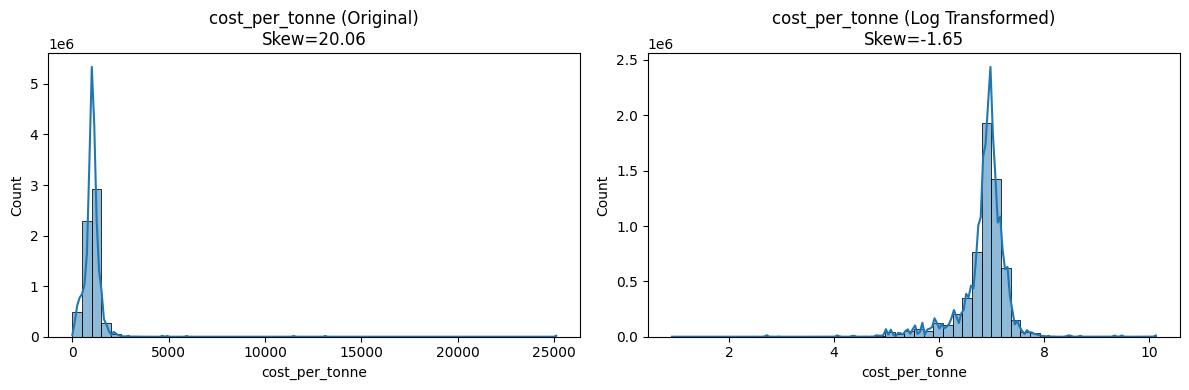

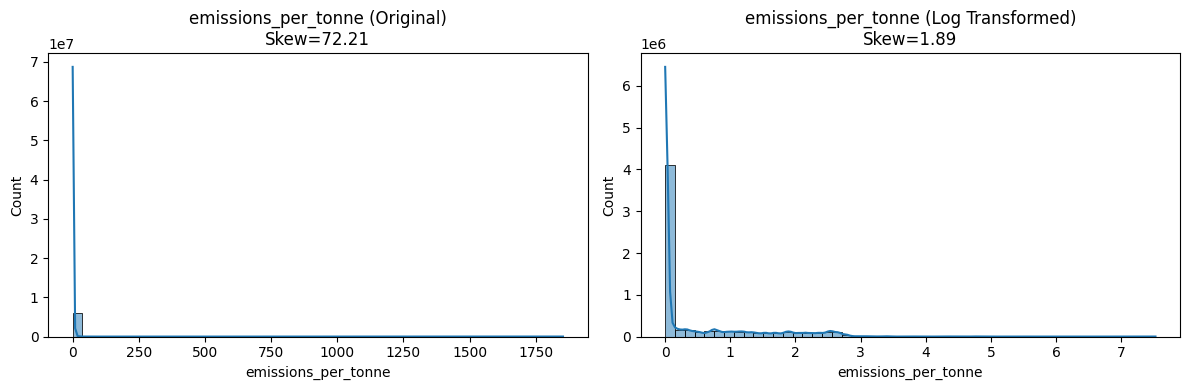

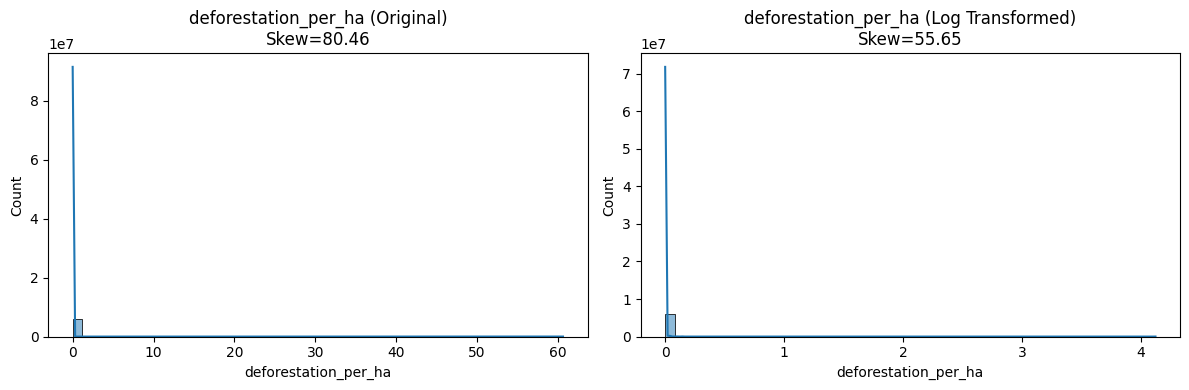

In [43]:
for col in box_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df_featured[col].dropna(), bins=50, kde=True, ax=axes[0])
    axes[0].set_title(f"{col} (Original)\nSkew={df_featured[col].skew():.2f}")

    sns.histplot(np.log1p(df_featured[col].dropna()), bins=50, kde=True, ax=axes[1])
    axes[1].set_title(f"{col} (Log Transformed)\nSkew={np.log1p(df_featured[col]).skew():.2f}")

    plt.tight_layout()
    plt.show()

In [44]:
new_skew = df_log[box_columns].skew().sort_values(ascending=False)
print(new_skew)

deforestation_per_ha               55.653626
emissions_fire_on_peat_exposure    16.252063
gross_emission_luc_exposure         8.373325
emission_subsidence_exposure        4.639474
oil_palm_ha                         4.417564
volume                              3.524185
emissions_per_tonne                 1.893294
fob                                 0.719139
cost_per_tonne                     -1.646143
dtype: float64


In [45]:
exporter_profiles_model = df_featured.groupby('exporter_group').agg(
    avg_emissions_kpi=('emissions_per_tonne', 'mean'),
    avg_deforestation_kpi=('deforestation_per_ha', 'mean'),
    avg_cost_per_tonne=('cost_per_tonne', 'mean'),
    total_volume=('volume', 'sum')
).reset_index()

In [46]:
from sklearn.preprocessing import RobustScaler

# Only use environmental intensity KPIs (exclude cost) for scaling / clustering / risk
risk_feature_cols = ['avg_emissions_kpi', 'avg_deforestation_kpi']
log_transformed = np.log1p(exporter_profiles_model[risk_feature_cols])

scaler = RobustScaler()
scaled_features = scaler.fit_transform(log_transformed)

In [47]:
scaled_features_df = pd.DataFrame(
    scaled_features,
    columns=risk_feature_cols,
    index=exporter_profiles_model['exporter_group']
)
# Attach raw (not scaled) cost & volume for downstream use / optimization only
scaled_features_df['avg_cost_per_tonne'] = exporter_profiles_model['avg_cost_per_tonne'].values
scaled_features_df['total_volume'] = exporter_profiles_model['total_volume'].values

In [48]:
print("Raw KPIs (for frontend) and model-ready features created successfully.")

Raw KPIs (for frontend) and model-ready features created successfully.


In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# This is your model-ready data from the previous steps (ONLY emissions + deforestation)
data_for_clustering = scaled_features_df[risk_feature_cols].values

# Define the range of k values you want to test
k_values_to_test = [2, 3]
silhouette_scores = {}

print("Calculating Silhouette Scores (cost excluded)...")
for k in k_values_to_test:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(data_for_clustering)
    score = silhouette_score(data_for_clustering, cluster_labels)
    silhouette_scores[k] = score
    print(f"  - For k={k}, the Silhouette Score is: {score:.4f}")

optimal_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nOptimal number of clusters (cost excluded) is k={optimal_k}.")

Calculating Silhouette Scores (cost excluded)...
  - For k=2, the Silhouette Score is: 0.6030
  - For k=3, the Silhouette Score is: 0.6352

Optimal number of clusters (cost excluded) is k=3.


In [50]:
# --- KMeans Clustering (cost excluded) ---
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
scaled_features_df['kmeans_cluster'] = kmeans.fit_predict(scaled_features_df[risk_feature_cols].values)

# --- Cluster Interpretation (still only emissions + deforestation) ---
cluster_analysis = scaled_features_df.groupby('kmeans_cluster')[risk_feature_cols].mean()
cluster_analysis['mean_risk'] = cluster_analysis[risk_feature_cols].mean(axis=1)

high_risk_cluster_id = cluster_analysis['mean_risk'].idxmax()
low_risk_cluster_id = cluster_analysis['mean_risk'].idxmin()

risk_map = {
    high_risk_cluster_id: 'High Risk',
    low_risk_cluster_id: 'Low Risk'
}

scaled_features_df['kmeans_risk_level'] = scaled_features_df['kmeans_cluster'].map(risk_map)

print("--- KMeans Risk Level Distribution (k=2, cost excluded) ---")
print(scaled_features_df['kmeans_risk_level'].value_counts())

--- KMeans Risk Level Distribution (k=2, cost excluded) ---
kmeans_risk_level
High Risk    29
Low Risk     11
Name: count, dtype: int64


In [51]:
from sklearn.cluster import DBSCAN

# --- DBSCAN Clustering ---
# The eps parameter is the most important to tune. 
# A good starting point is often between 0.5 and 2 for scaled data.
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(scaled_features)

# Add the labels back to your dataframe
scaled_features_df['dbscan_cluster'] = dbscan_labels

# --- Analyze the Results ---
# The label '-1' indicates noise (outliers).
print("--- DBSCAN Clustering Results ---")
print(scaled_features_df['dbscan_cluster'].value_counts())

--- DBSCAN Clustering Results ---
dbscan_cluster
1    37
0     3
Name: count, dtype: int64


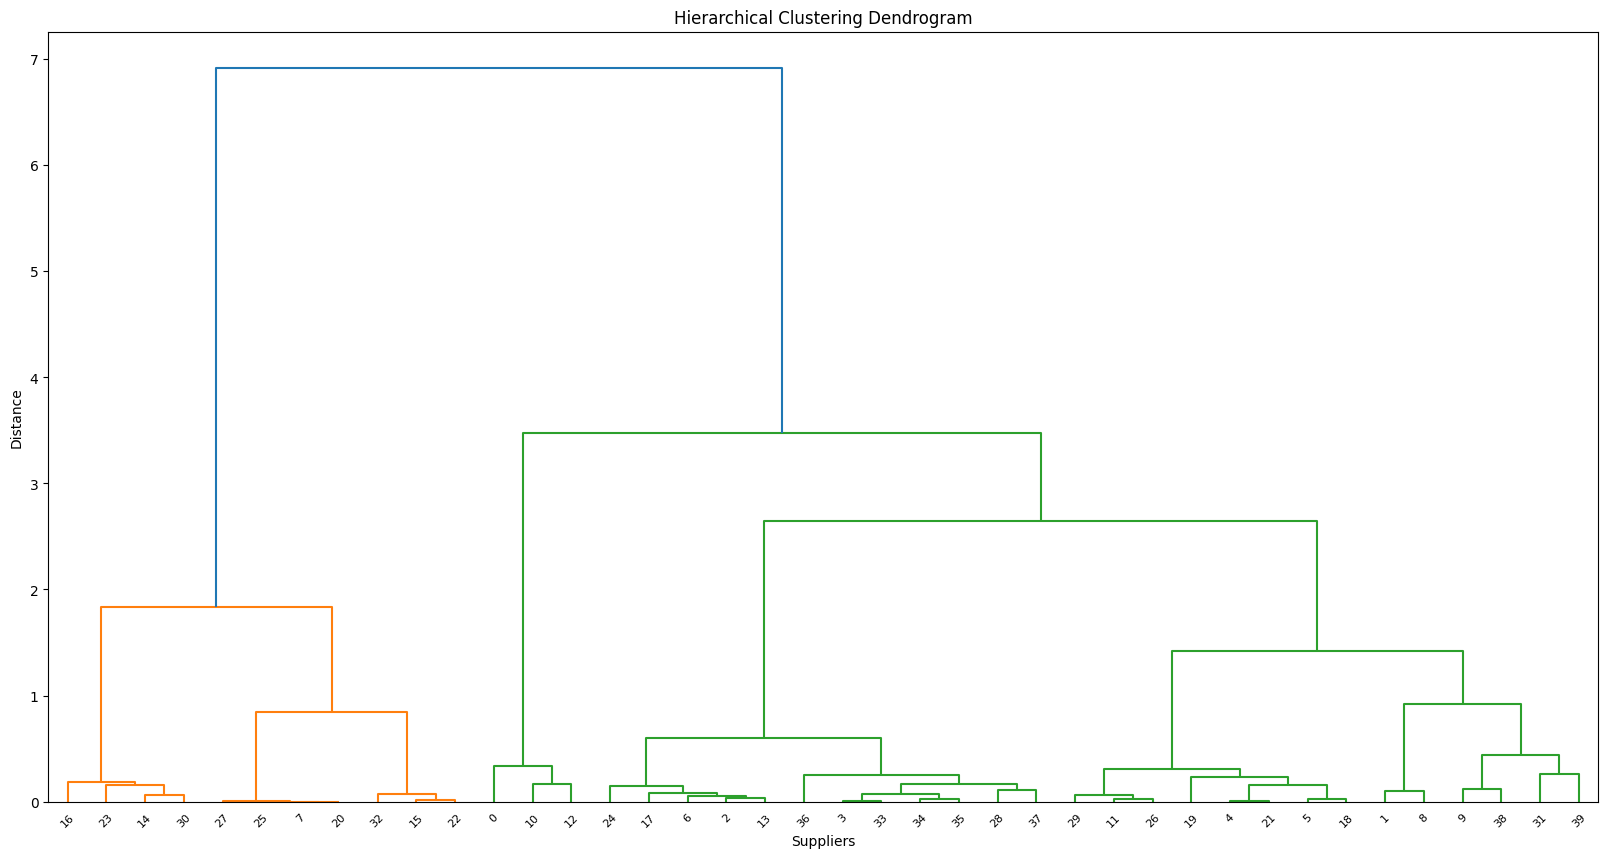


--- Hierarchical Clustering Results (k=3) ---
hierarchical_cluster
0    26
1    11
2     3
Name: count, dtype: int64


In [52]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# --- 1. Plot the Dendrogram to Visualize Clusters ---
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Suppliers')
plt.ylabel('Distance')
plt.show()

# --- 2. Apply Agglomerative Clustering to get labels ---
# We specify n_clusters=3, which is like "cutting" the dendrogram to get 3 groups.
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg_cluster.fit_predict(scaled_features)

# Add the labels back to your dataframe
scaled_features_df['hierarchical_cluster'] = agg_labels

# --- Analyze the Results ---
print("\n--- Hierarchical Clustering Results (k=3) ---")
print(scaled_features_df['hierarchical_cluster'].value_counts())

In [53]:
# Assume 'exporter_profiles' and 'scaled_features' (from RobustScaler) already exist

profiles_df = scaled_features_df.copy()

# --- Step 1: Create a Single Risk Score from ONLY environmental scaled features (cost excluded) ---
profiles_df['risk_score'] = profiles_df[risk_feature_cols].mean(axis=1)

# --- Step 2: Define Risk Levels Based on Percentiles (Quantiles) ---
high_risk_threshold = profiles_df['risk_score'].quantile(0.80)
low_risk_threshold = profiles_df['risk_score'].quantile(0.40)

def assign_risk_level(score):
    if score >= high_risk_threshold:
        return 'High Risk'
    elif score >= low_risk_threshold:
        return 'Medium Risk'
    else:
        return 'Low Risk'

profiles_df['risk_level'] = profiles_df['risk_score'].apply(assign_risk_level)

print("--- Percentile-Based Risk Profiling Complete (cost excluded) --- ✅")
print("\nNew Risk Level Distribution:")
print(profiles_df['risk_level'].value_counts())

--- Percentile-Based Risk Profiling Complete (cost excluded) --- ✅

New Risk Level Distribution:
risk_level
Low Risk       16
Medium Risk    16
High Risk       8
Name: count, dtype: int64


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# We now EXCLUDE cost from the predictive feature set to stay consistent
# with the fact that risk_score & clustering were computed only from
# environmental intensity KPIs (emissions + deforestation).
# If you want to compare with a model including cost, you can create
# another feature matrix with cost and evaluate both.

risk_model_features = ['avg_emissions_kpi', 'avg_deforestation_kpi']
X = profiles_df[risk_model_features]
y = profiles_df['risk_level']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Predictive Model Accuracy (cost excluded): {accuracy_score(y_test, y_pred):.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

importances = model.feature_importances_
feature_importance_df = (
    pd.DataFrame({'feature': risk_model_features, 'importance': importances})
      .sort_values(by='importance', ascending=False)
)
print("\nFeature Importance (cost excluded):")
print(feature_importance_df)

# OPTIONAL: uncomment below to benchmark including cost
# with_cost_features = ['avg_emissions_kpi','avg_deforestation_kpi','avg_cost_per_tonne']
# Xc = profiles_df[with_cost_features]
# Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, y, test_size=0.2, random_state=42, stratify=y)
# model_c = RandomForestClassifier(n_estimators=150, random_state=42).fit(Xc_train, yc_train)
# yc_pred = model_c.predict(Xc_test)
# print(f"\nAccuracy WITH cost feature: {accuracy_score(yc_test, yc_pred):.2f}")

Predictive Model Accuracy (cost excluded): 0.88

Classification Report:
              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00         2
    Low Risk       0.75      1.00      0.86         3
 Medium Risk       1.00      0.67      0.80         3

    accuracy                           0.88         8
   macro avg       0.92      0.89      0.89         8
weighted avg       0.91      0.88      0.87         8


Feature Importance (cost excluded):
                 feature  importance
0      avg_emissions_kpi    0.541956
1  avg_deforestation_kpi    0.458044


In [55]:
# --- Step 1: Programmatically Create Weights from the DataFrame ---
# This converts your feature_importance_df into the dictionary you need
feature_weights = feature_importance_df.set_index('feature')['importance'].to_dict()

print("--- Data-Driven Weights from Random Forest ---")
print(feature_weights)

# Ensure the weights are in the correct order for the calculation
risk_feature_cols = ['avg_emissions_kpi', 'avg_deforestation_kpi']
ordered_weights = [feature_weights[col] for col in risk_feature_cols]


# --- Step 2: Create a NEW Weighted Risk Score ---
profiles_df = scaled_features_df.copy()
profiles_df['risk_score'] = np.average(
    profiles_df[risk_feature_cols], 
    axis=1, 
    weights=ordered_weights
)


# --- Step 3: Define Risk Levels Based on Percentiles of the NEW Weighted Score ---
high_risk_threshold = profiles_df['risk_score'].quantile(0.80) 
low_risk_threshold = profiles_df['risk_score'].quantile(0.40)

def assign_risk_level(score):
    if score >= high_risk_threshold:
        return 'High Risk'
    elif score >= low_risk_threshold:
        return 'Medium Risk'
    else:
        return 'Low Risk'

profiles_df['risk_level'] = profiles_df['risk_score'].apply(assign_risk_level)

print("\n--- Percentile-Based Risk Profiling Complete (using RF weights) --- ✅")
print("\nNew Risk Level Distribution:")
print(profiles_df['risk_level'].value_counts())

--- Data-Driven Weights from Random Forest ---
{'avg_emissions_kpi': 0.5419560275792835, 'avg_deforestation_kpi': 0.4580439724207164}

--- Percentile-Based Risk Profiling Complete (using RF weights) --- ✅

New Risk Level Distribution:
risk_level
Low Risk       16
Medium Risk    16
High Risk       8
Name: count, dtype: int64


In [56]:
# Build final exporter profile table combining raw KPIs + scaled environmental KPIs + clustering + risk
# Cost is EXCLUDED from scaling / clustering / risk but retained as raw avg_cost_per_tonne.
# Preconditions:
#   exporter_profiles_model : raw aggregated KPIs (one row per exporter_group)
#   scaled_features_df      : scaled (log + RobustScaler) env features with exporter_group as index
#   profiles_df             : copy of scaled_features_df plus risk_score, risk_level, cluster labels

raw_df = exporter_profiles_model.copy()
assert 'exporter_group' in raw_df.columns, "exporter_group missing in raw_df"

# Only environmental features were scaled
scaled_cols_original = risk_feature_cols  # ['avg_emissions_kpi','avg_deforestation_kpi']
scaled_prefixed = (
    scaled_features_df[scaled_cols_original]
      .rename(columns={c: f"scaled_{c}" for c in scaled_cols_original})
      .reset_index()
)

risk_cols = ['risk_score', 'risk_level']
cluster_cols = [c for c in ['kmeans_cluster','kmeans_risk_level','dbscan_cluster','hierarchical_cluster'] if c in profiles_df.columns]
profiles_meta = (
    profiles_df[risk_cols + cluster_cols]
      .reset_index()
)

final_exporter_profiles = (raw_df
    .merge(scaled_prefixed, on='exporter_group', how='left')
    .merge(profiles_meta, on='exporter_group', how='left')
)

# Integrity checks
assert final_exporter_profiles['exporter_group'].isna().sum() == 0, "Null exporter_group values after merge"
assert final_exporter_profiles['exporter_group'].nunique() == len(final_exporter_profiles), "Duplicate exporter_group rows found"

# Order by risk then volume (highest risk first for visibility)
final_exporter_profiles = final_exporter_profiles.sort_values(
    ['risk_score','total_volume'], ascending=[False, False]
).reset_index(drop=True)

final_exporter_profiles.to_csv('final_exporter_profiles.csv', index=False)
df_featured.to_csv('cleaned_data_for_app.csv', index=False)

print("✅ Saved final_exporter_profiles.csv with: raw KPIs, scaled environmental KPIs only (cost excluded from risk), clustering & risk columns.")
print("Columns:")
print(final_exporter_profiles.columns.tolist())
print("Rows:", len(final_exporter_profiles))
final_exporter_profiles.head()

✅ Saved final_exporter_profiles.csv with: raw KPIs, scaled environmental KPIs only (cost excluded from risk), clustering & risk columns.
Columns:
['exporter_group', 'avg_emissions_kpi', 'avg_deforestation_kpi', 'avg_cost_per_tonne', 'total_volume', 'scaled_avg_emissions_kpi', 'scaled_avg_deforestation_kpi', 'risk_score', 'risk_level', 'kmeans_cluster', 'kmeans_risk_level', 'dbscan_cluster', 'hierarchical_cluster']
Rows: 40


,exporter_group,avg_emissions_kpi,avg_deforestation_kpi,avg_cost_per_tonne,total_volume,scaled_avg_emissions_kpi,scaled_avg_deforestation_kpi,risk_score,risk_level,kmeans_cluster,kmeans_risk_level,dbscan_cluster,hierarchical_cluster
0,AHMAD ZAKI RESOURCES BERHAD,5.311226,0.000000,1100.000000,4.342558e+02,1.464788,-0.453633,0.586067,High Risk,1,High Risk,0,2
1,UNKNOWN,2.126049,0.015428,963.953095,1.060715e+07,0.153662,0.956947,0.521602,High Risk,1,High Risk,1,0
2,KEMINDO,4.630856,0.000000,1082.824375,1.860428e+04,1.251912,-0.453633,0.470697,High Risk,1,High Risk,0,2
3,UNILEVER,2.040972,0.014243,1491.021315,1.141053e+03,0.102168,0.849311,0.444392,High Risk,1,High Risk,1,0
4,TANIMAS,2.032912,0.013951,1098.078880,9.576210e+04,0.097215,0.822857,0.429591,High Risk,1,High Risk,1,0


waittttt

In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler

def create_fcm_sourcing_plan(profiles_df, volume_needed, max_share=0.4, min_suppliers=1, exclude_list=None, model_params=None):
    """
    Creates a sustainability-focused plan using an FCM that learns the cost-risk tradeoff.
    """
    if model_params is None:
        model_params = {}
        
    # --- Data Preparation ---
    df = profiles_df.copy()
    if exclude_list:
        df = df[~df['exporter_group'].isin(exclude_list)]

    features = ['avg_emissions_kpi', 'avg_deforestation_kpi', 'avg_cost_per_tonne', 'total_volume']
    target_label = 'risk_level'
    
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(df[features])
    X = torch.tensor(X_scaled, dtype=torch.float32)

    label_map = {'Low Risk': 0, 'Medium Risk': 1, 'High Risk': 2}
    y_numeric = df[target_label].map(label_map).values
    y = torch.tensor(y_numeric / 2.0, dtype=torch.float32).unsqueeze(1)

    # --- FCM Model Definition & Training ---
    class FCM(nn.Module):
        def __init__(self, n_concepts):
            super().__init__()
            self.W = nn.Parameter(torch.randn(n_concepts, n_concepts) * model_params.get('init_weight_scale', 0.1))

        def forward(self, X_input, steps):
            state = torch.cat([X_input, torch.full((X_input.shape[0], 1), 0.5)], dim=1)
            for _ in range(steps):
                state = torch.sigmoid(state @ self.W)
            return state[:, -1]

    model = FCM(n_concepts=len(features) + 1)
    optimizer = optim.Adam(model.parameters(), lr=model_params.get('learning_rate', 0.01))
    loss_fn = nn.MSELoss()

    for epoch in range(model_params.get('epochs', 500)):
        optimizer.zero_grad()
        y_pred = model(X, steps=model_params.get('fcm_steps', 10)).unsqueeze(1)
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()
    
    # --- Generate Fuzzy Tradeoff Score Directly from FCM Output ---
    with torch.no_grad():
        # The FCM's output is the holistic score (higher = higher risk). We invert it.
        df['fuzzy_tradeoff_score'] = 1 - model(X, steps=model_params.get('fcm_steps', 10)).numpy()
    
    # --- Optimization Logic ---
    low_medium_suppliers = df[df['risk_level'].isin(['Low Risk', 'Medium Risk'])]
    if low_medium_suppliers['total_volume'].sum() >= volume_needed:
        print("INFO: Sufficient Low/Medium risk capacity found. Excluding High Risk suppliers.")
        suppliers_to_consider = low_medium_suppliers
    else:
        print("INFO: Insufficient Low/Medium risk capacity. Including all suppliers as fallback.")
        suppliers_to_consider = df
        
    sorted_suppliers = suppliers_to_consider.sort_values(by='fuzzy_tradeoff_score', ascending=False)
    
    plan_list = []
    volume_to_fill = volume_needed
    
    effective_max_share = max_share
    if min_suppliers and min_suppliers > 0:
        effective_max_share = min(max_share, 1 / min_suppliers)
    
    max_volume_per_supplier = volume_needed * effective_max_share
    
    for _, supplier in sorted_suppliers.iterrows():
        if volume_to_fill <= 1: break
        volume_from_supplier = min(volume_to_fill, supplier['total_volume'], max_volume_per_supplier)
        if volume_from_supplier > 1:
            plan_list.append(supplier.to_dict() | {'Volume Sourced': volume_from_supplier})
        volume_to_fill -= volume_from_supplier
        
    return pd.DataFrame(plan_list)

# --- 1. USER INPUTS ---
required_volume = 50000
max_share_per_supplier = 0.5
min_number_of_suppliers = 4
excluded_suppliers = ['UNKNOWN', 'UNKNOWN AFFILIATION']

# --- 2. MODEL HYPERPARAMETERS ---
model_hyperparams = {
    'learning_rate': 0.01,
    'epochs': 500,
    'fcm_steps': 10,
    'init_weight_scale': 0.1
}

# --- 3. RUN THE OPTIMIZER ---
try:
    supplier_profiles = pd.read_csv('final_exporter_profiles.csv')
    final_plan = create_fcm_sourcing_plan(
        profiles_df=supplier_profiles,
        volume_needed=required_volume,
        max_share=max_share_per_supplier,
        min_suppliers=min_number_of_suppliers,
        exclude_list=excluded_suppliers,
        model_params=model_hyperparams
    )
    
    print("\n--- Final Sourcing Plan (from Fuzzy Cognitive Map) ---")
    display_cols = ['exporter_group', 'Volume Sourced', 'risk_level', 'avg_cost_per_tonne', 'fuzzy_tradeoff_score']
    print(final_plan[display_cols].rename(columns={'exporter_group': 'Exporter'}).round(2))

except FileNotFoundError:
    print("\nERROR: Could not find 'final_exporter_profiles.csv'. Please ensure the file is available.")
except Exception as e:
    print(f"\nAn error occurred: {e}")

INFO: Sufficient Low/Medium risk capacity found. Excluding High Risk suppliers.

--- Final Sourcing Plan (from Fuzzy Cognitive Map) ---
             Exporter  Volume Sourced   risk_level  avg_cost_per_tonne  \
0  ROYAL GOLDEN EAGLE         12500.0  Medium Risk              943.96   
1         DARMEX AGRO         12500.0  Medium Risk             1166.44   
2            KPN CORP         12500.0  Medium Risk             1043.29   
3  ASTRA AGRO LESTARI         12500.0  Medium Risk             1094.46   

   fuzzy_tradeoff_score  
0                  0.62  
1                  0.62  
2                  0.62  
3                  0.62  


###FCM+DAS

In [9]:
"""hybrid_tuned_with_das_combined.py

Merged and cleaned single-file implementation combining:
 - original hybrid_with_tuning pipeline (FCM + NSGA-II + Greedy + LP + DAS)
 - enhancements: Entropy method for objective weighting, volume/stability proxy, and
   updated LP objective to maximize final_score.

Notes:
 - This file has been sanity-checked for consistent function names and signatures.
 - Replace CSV_PATH in the __main__ block with your actual CSV path before running.
"""

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from itertools import product
from scipy.optimize import linprog
import random

# pymoo v2
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM

# Set random seeds for reproducibility
def set_random_seeds(seed=42):
    """Set random seeds for all libraries to ensure reproducible results."""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    # For deterministic behavior (may impact performance)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# ------------------ FCM Model ------------------
class FCM(nn.Module):
    def __init__(self, n_concepts, init_weight_scale=0.1):
        super().__init__()
        # weight matrix maps concepts -> concepts
        self.W = nn.Parameter(torch.randn(n_concepts, n_concepts) * init_weight_scale)

    def forward(self, X_input, steps=10):
        # Initialize state with input features and the Risk concept (starting at 0.5)
        state = torch.cat([X_input, torch.full((X_input.shape[0], 1), 0.5)], dim=1)
        for _ in range(steps):
            state = torch.sigmoid(state @ self.W)
        # return the Risk concept activation
        return state[:, -1]

# ------------------ Entropy Method ------------------
def compute_entropy_weights(df, criteria_cols):
    """
    Computes entropy-based weights for the supplied normalized criteria columns.
    Returns a dict mapping column -> weight (sums to 1).
    """
    X = df[criteria_cols].values.astype(float)
    N = X.shape[0]
    # avoid division by zero
    col_sums = X.sum(axis=0) + 1e-9
    P = X / col_sums
    # entropy
    e_matrix = P * np.log(P + 1e-9)
    E = -np.nansum(e_matrix, axis=0) / np.log(max(N, 2))
    d = 1 - E
    w = d / (d.sum() + 1e-9)
    return dict(zip(criteria_cols, w))

# ------------------ Compute FCM+DAS Scores (with Entropy) ------------------
def compute_fcm_das_scores(df, model_params, user_risk_weight):
    df = df.copy().reset_index(drop=True)
    features = ['avg_emissions_kpi', 'avg_deforestation_kpi', 'avg_cost_per_tonne', 'total_volume']
    for f in features:
        if f not in df.columns:
            raise ValueError(f"Missing required feature column: {f}")
    df[features] = df[features].fillna(df[features].mean())

    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(df[features])
    X = torch.tensor(X_scaled, dtype=torch.float32)

    # Labels for weak supervision if present
    if 'risk_level' in df.columns:
        label_map = {'Low Risk': 0, 'Medium Risk': 1, 'High Risk': 2}
        y_numeric = df['risk_level'].map(label_map).fillna(1).values
    else:
        y_numeric = np.ones(len(df))
    y = torch.tensor(y_numeric / 2.0, dtype=torch.float32).unsqueeze(1)

    # Build and train FCM
    model = FCM(n_concepts=len(features) + 1, init_weight_scale=float(model_params.get('init_weight_scale', 0.05)))
    optimizer = optim.Adam(model.parameters(), lr=float(model_params.get('learning_rate', 0.01)))
    loss_fn = nn.MSELoss()
    epochs = int(model_params.get('epochs', 100))
    fcm_steps = int(model_params.get('fcm_steps', 10))

    model.train()
    for _ in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X, steps=fcm_steps).unsqueeze(1)
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        fcm_raw = model(X, steps=fcm_steps).numpy().flatten()

    # Convert FCM output to benefit (higher = better sustainability)
    s_fcm_raw = 1.0 - fcm_raw
    s_fcm_norm = (s_fcm_raw - s_fcm_raw.min()) / (s_fcm_raw.max() - s_fcm_raw.min() + 1e-9)

    # Cost benefit (lower cost -> higher benefit)
    cost_benefit = 1.0 - (df['avg_cost_per_tonne'] / (df['avg_cost_per_tonne'].max() + 1e-9))
    cost_norm = (cost_benefit - cost_benefit.min()) / (cost_benefit.max() - cost_benefit.min() + 1e-9)

    # Emissions benefit (lower emissions -> higher benefit)
    em_benefit = 1.0 - (df['avg_emissions_kpi'] / (df['avg_emissions_kpi'].max() + 1e-9))
    em_norm = (em_benefit - em_benefit.min()) / (em_benefit.max() - em_benefit.min() + 1e-9)

    # Volume/Stability proxy (higher volume -> more stable supplier)
    volume_stability = df['total_volume'] / (df['total_volume'].max() + 1e-9)
    vol_norm = (volume_stability - volume_stability.min()) / (volume_stability.max() - volume_stability.min() + 1e-9)

    df['s_fcm_norm'] = s_fcm_norm
    df['cost_norm'] = cost_norm
    df['em_norm'] = em_norm
    df['vol_norm'] = vol_norm

    # Compute entropy weights over selected criteria
    criteria_for_entropy = ['vol_norm', 'cost_norm', 'em_norm']
    entropy_weights = compute_entropy_weights(df, criteria_for_entropy)

    w_vol = entropy_weights.get('vol_norm', 0.0)
    w_cost_obj = entropy_weights.get('cost_norm', 0.0)
    w_em_obj = entropy_weights.get('em_norm', 0.0)

    weighted_non_fcm = (
        w_vol * df['vol_norm'].values +
        w_cost_obj * df['cost_norm'].values +
        w_em_obj * df['em_norm'].values
    )

    final_score = user_risk_weight * df['s_fcm_norm'].values + (1 - user_risk_weight) * weighted_non_fcm
    df['final_score'] = final_score

    return df, entropy_weights

# ------------------ Hyperparameter Tuning (FCM) ------------------
def tune_fcm_hyperparams(df, param_grid, user_risk_weight):
    best = None
    best_params = None
    for params in product(*param_grid.values()):
        model_params = dict(zip(param_grid.keys(), params))
        scored, _ = compute_fcm_das_scores(df.copy(), model_params, user_risk_weight)
        score = scored['final_score'].mean()
        if (best is None) or (score > best):
            best = score
            best_params = model_params
    return best_params

# ------------------ NSGA-II exploration ------------------
def run_nsga(df, required_volume, max_share, pop_size, gens, sbx_eta, pm_eta, crossover_prob):
    n = len(df)
    ub = np.minimum(max_share * required_volume, df['total_volume'].values)
    lb = np.zeros(n)

    class SourcingProblem(Problem):
        def __init__(self):
            super().__init__(n_var=n, n_obj=2, n_constr=1, xl=lb, xu=ub)

        def _evaluate(self, X, out, *args, **kwargs):
            F1, F2, G = [], [], []
            cost_per_tonne = df['avg_cost_per_tonne'].values
            sustain_vec = df['final_score'].values
            for row in X:
                total_cost = float(np.dot(row, cost_per_tonne))
                neg_sustain = -float(np.dot(row, sustain_vec))
                constraint = float(row.sum() - required_volume)
                F1.append(total_cost)
                F2.append(neg_sustain)
                G.append([constraint])
            out["F"] = np.column_stack([F1, F2])
            out["G"] = np.array(G)

    problem = SourcingProblem()
    algorithm = NSGA2(
        pop_size=int(pop_size),
        sampling=FloatRandomSampling(),
        crossover=SBX(prob=float(crossover_prob), eta=float(sbx_eta)),
        mutation=PM(eta=float(pm_eta)),
        eliminate_duplicates=True
    )

    res = minimize(problem, algorithm, termination=('n_gen', int(gens)), verbose=False)
    return res

# ------------------ Greedy refine around candidate ------------------
def greedy_refine(candidate, df, required_volume, max_share, user_risk_weight, alpha=0.7):
    df2 = df.copy().reset_index(drop=True)
    n = len(df2)
    cap = np.minimum(max_share * required_volume, df2['total_volume'].values)
    alloc = np.zeros(n)
    remaining = required_volume
    ranked = df2.sort_values('final_score', ascending=False).reset_index()
    for _, row in ranked.iterrows():
        i = int(row['index'])
        give = min(cap[i], remaining)
        alloc[i] = give
        remaining -= give
        if remaining <= 0:
            break
    if remaining > 1e-6:
        avail = cap - alloc
        if avail.sum() > 0:
            alloc += avail * (remaining / (avail.sum() + 1e-12))
            remaining = 0.0

    blended = alpha * alloc + (1 - alpha) * candidate
    blended = np.minimum(blended, cap)
    if blended.sum() > 0:
        blended = blended / blended.sum() * required_volume
    return blended

# ------------------ LP refine ------------------
def lp_refine(df, init_alloc, required_volume, max_share, min_suppliers):
    n = len(df)
    # Objective: maximize final_score -> minimize negative final_score
    c = -df['final_score'].values

    ub = np.minimum(max_share * required_volume, df['total_volume'].values)
    lb = np.zeros(n)

    top_idx = np.argsort(-df['final_score'].values)[:min_suppliers]
    min_share_each = max(0.01 * required_volume, required_volume * 0.001)
    for i in top_idx:
        lb[i] = min(min_share_each, ub[i])

    bounds = [(float(lb[i]), float(ub[i])) for i in range(n)]
    A_eq = np.ones((1, n))
    b_eq = np.array([required_volume])

    res = linprog(c=c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')
    if res.success:
        return res.x
    # fallback
    alloc = np.minimum(init_alloc, ub)
    for i in range(n):
        if alloc[i] < lb[i]:
            alloc[i] = lb[i]
    if alloc.sum() <= 0:
        alloc = lb + 1e-6
    alloc = alloc / alloc.sum() * required_volume
    return alloc

# ------------------ Composite evaluation ------------------
def evaluate_solution(df_out, original_df):
    w_base = original_df['total_volume'].values
    baseline_cost = (original_df['avg_cost_per_tonne'] * w_base).sum() / w_base.sum()
    baseline_em = (original_df['avg_emissions_kpi'] * w_base).sum() / w_base.sum()
    baseline_def = (original_df['avg_deforestation_kpi'] * w_base).sum() / w_base.sum()

    opt_w = df_out['Volume_Sourced'].values
    optimized_cost = (df_out['avg_cost_per_tonne'] * opt_w).sum() / opt_w.sum()
    optimized_em = (df_out['avg_emissions_kpi'] * opt_w).sum() / opt_w.sum()
    optimized_def = (df_out['avg_deforestation_kpi'] * opt_w).sum() / opt_w.sum()

    cost_imp = (baseline_cost - optimized_cost) / (baseline_cost + 1e-9)
    em_imp = (baseline_em - optimized_em) / (baseline_em + 1e-9)
    def_imp = (baseline_def - optimized_def) / (baseline_def + 1e-9)

    composite = 0.3 * cost_imp + 0.5 * em_imp + 0.2 * def_imp
    return composite, (baseline_cost, optimized_cost, baseline_em, optimized_em, baseline_def, optimized_def)

# ------------------ Full hybrid pipeline ------------------
def hybrid_with_tuning(csv_path,
                       required_volume=50000,
                       max_share_per_supplier=0.5,
                       min_suppliers=4,
                       user_risk_weight=1.0,
                       fcm_param_grid=None,
                       nsga_param_grid=None,
                       das_enabled=True,
                       random_seed=42):
    
    # Set random seeds for reproducibility
    set_random_seeds(random_seed)
    
    df = pd.read_csv(csv_path).reset_index(drop=True)
    # quick checks
    for c in ['avg_cost_per_tonne','avg_emissions_kpi','avg_deforestation_kpi','total_volume','exporter_group']:
        if c not in df.columns:
            raise ValueError(f"Missing column: {c}")

    if fcm_param_grid is None:
        fcm_param_grid = {
            'learning_rate':[0.01, 0.03],
            'epochs':[100, 200],
            'fcm_steps':[5, 10],
            'init_weight_scale':[0.05, 0.1]
        }

    if nsga_param_grid is None:
        nsga_param_grid = {
            'pop_size':[60, 100],
            'gens':[80, 150],
            'sbx_eta':[10, 20],
            'pm_eta':[10, 20],
            'crossover_prob':[0.9, 0.8]
        }

    # 1) Tune FCM hyperparams
    print("Tuning FCM hyperparameters...")
    best_fcm = tune_fcm_hyperparams(df, fcm_param_grid, user_risk_weight)
    print("Best FCM params:", best_fcm)

    # compute scores and entropy weights
    scored, entropy_weights = compute_fcm_das_scores(df.copy(), best_fcm, user_risk_weight)

    print("\n🔬 Objective Entropy Weights (Justification):")
    print(f"  - Stability/Volume Weight : {entropy_weights.get('vol_norm', 0):.4f}")
    print(f"  - Cost Efficiency Weight  : {entropy_weights.get('cost_norm', 0):.4f}")
    print(f"  - Emissions Perf. Weight  : {entropy_weights.get('em_norm', 0):.4f}")
    print("  (Sum = 1.0000. These weights are used in the final score calculation.)")

    # baseline metrics for later
    baseline_weight = df['total_volume'].values
    baseline_cost = (df['avg_cost_per_tonne'] * baseline_weight).sum() / baseline_weight.sum()
    baseline_em = (df['avg_emissions_kpi'] * baseline_weight).sum() / baseline_weight.sum()
    baseline_def = (df['avg_deforestation_kpi'] * baseline_weight).sum() / baseline_weight.sum()

    # 2) Tune NSGA parameters by small grid search (evaluating composite improvement)
    print("Tuning NSGA parameters (grid search, may take a while)...")
    best_nsga_cfg = None
    best_composite = -np.inf
    best_plan = None
    tested = 0
    for pop_size, gens, sbx_eta, pm_eta, crossover_prob in product(
            nsga_param_grid['pop_size'],
            nsga_param_grid['gens'],
            nsga_param_grid['sbx_eta'],
            nsga_param_grid['pm_eta'],
            nsga_param_grid['crossover_prob']):
        tested += 1
        try:
            res = run_nsga(scored, required_volume, max_share_per_supplier, pop_size, gens, sbx_eta, pm_eta, crossover_prob)
        except Exception as e:
            print("NSGA run failed for config:", pop_size, gens, sbx_eta, pm_eta, crossover_prob, "->", e)
            continue

        candidates = res.X if hasattr(res, 'X') else (np.array([res.x]) if hasattr(res, 'x') else np.array([]))
        for cand in candidates:
            cand = np.atleast_1d(cand)
            cap = np.minimum(max_share_per_supplier * required_volume, scored['total_volume'].values)
            cand = np.minimum(cand, cap)
            if cand.sum() <= 0:
                continue
            cand = cand / cand.sum() * required_volume
            refined = greedy_refine(cand, scored, required_volume, max_share_per_supplier, user_risk_weight, alpha=0.6)
            final_alloc = lp_refine(scored, refined, required_volume, max_share_per_supplier, min_suppliers)
            df_out = scored.copy()
            df_out['Volume_Sourced'] = final_alloc
            df_out = df_out[df_out['Volume_Sourced'] > 1e-6]
            composite, metrics = evaluate_solution(df_out, df)
            if composite > best_composite:
                best_composite = composite
                best_nsga_cfg = {'pop_size':pop_size,'gens':gens,'sbx_eta':sbx_eta,'pm_eta':pm_eta,'crossover_prob':crossover_prob}
                best_plan = df_out.copy()

    if best_nsga_cfg is None:
        print("No NSGA config produced improvement; using proportional final_score allocation.")
        weights = scored['final_score'].values
        if weights.sum() == 0:
            weights = np.ones_like(weights)
        candidate = weights / weights.sum() * required_volume
        refined = greedy_refine(candidate, scored, required_volume, max_share_per_supplier, user_risk_weight, alpha=0.6)
        final_alloc = lp_refine(scored, refined, required_volume, max_share_per_supplier, min_suppliers)
        best_plan = scored.copy()
        best_plan['Volume_Sourced'] = final_alloc
        best_plan = best_plan[best_plan['Volume_Sourced'] > 1e-6].sort_values('Volume_Sourced', ascending=False)
    else:
        print("Best NSGA config:", best_nsga_cfg)

    # 3) DAS: diversity check and adaptive rerun
    if das_enabled:
        print("Running DAS check and adaptive rerun if needed...")
        if best_plan is not None and len(best_plan) > 0:
            diversity = float(best_plan['final_score'].std())
        else:
            diversity = 0.0
        print(f"Observed diversity in chosen plan: {diversity:.6f}")
        if diversity < 0.05:
            print("Diversity low -> re-running NSGA with stronger mutation (DAS)...")
            das_pm_eta = 30
            das_sbx_eta = 8
            das_pop = best_nsga_cfg['pop_size'] if best_nsga_cfg else 100
            das_gens = best_nsga_cfg['gens'] if best_nsga_cfg else 100
            try:
                res2 = run_nsga(scored, required_volume, max_share_per_supplier, das_pop, das_gens, das_sbx_eta, das_pm_eta, best_nsga_cfg.get('crossover_prob',0.9) if best_nsga_cfg else 0.9)
                candidates = res2.X if hasattr(res2, 'X') else (np.array([res2.x]) if hasattr(res2, 'x') else np.array([]))
                improved = False
                for cand in candidates:
                    cand = np.atleast_1d(cand)
                    cap = np.minimum(max_share_per_supplier * required_volume, scored['total_volume'].values)
                    cand = np.minimum(cand, cap)
                    if cand.sum() <= 0:
                        continue
                    cand = cand / cand.sum() * required_volume
                    refined = greedy_refine(cand, scored, required_volume, max_share_per_supplier, user_risk_weight, alpha=0.7)
                    final_alloc = lp_refine(scored, refined, required_volume, max_share_per_supplier, min_suppliers)
                    df_out = scored.copy()
                    df_out['Volume_Sourced'] = final_alloc
                    df_out = df_out[df_out['Volume_Sourced'] > 1e-6]
                    composite, metrics = evaluate_solution(df_out, df)
                    if composite > best_composite + 1e-6:
                        best_composite = composite
                        best_plan = df_out.copy()
                        improved = True
                if improved:
                    print("DAS rerun improved composite metric.")
                else:
                    print("DAS rerun did not improve composite metric.")
            except Exception as e:
                print("DAS rerun failed:", e)

    # 4) Final result
    final_df = best_plan.copy() if best_plan is not None else pd.DataFrame()
    if final_df.empty:
        raise RuntimeError("No feasible sourcing plan produced.")

    opt_w = final_df['Volume_Sourced'].values
    optimized_cost = (final_df['avg_cost_per_tonne'] * opt_w).sum() / opt_w.sum()
    optimized_em = (final_df['avg_emissions_kpi'] * opt_w).sum() / opt_w.sum()
    optimized_def = (final_df['avg_deforestation_kpi'] * opt_w).sum() / opt_w.sum()

    # Print nicely
    print("\n✅ Final Results (5 decimal places):")
    print(f"Baseline avg_cost_per_tonne    : {baseline_cost:.5f}")
    print(f"Optimized avg_cost_per_tonne   : {optimized_cost:.5f}")
    print(f"Baseline avg_emissions_kpi     : {baseline_em:.5f}")
    print(f"Optimized avg_emissions_kpi    : {optimized_em:.5f}")
    print(f"Baseline avg_deforestation_kpi : {baseline_def:.5f}")
    print(f"Optimized avg_deforestation_kpi: {optimized_def:.5f}")

    display_cols = ['exporter_group','Volume_Sourced','final_score','avg_cost_per_tonne','avg_emissions_kpi','avg_deforestation_kpi','total_volume']
    with pd.option_context('display.float_format','{:.5f}'.format):
        print("\n🌿 Final Sourcing Plan (top rows):")
        print(final_df[display_cols].head(40))

    final_allocation_vector = np.zeros(len(df))
    for idx, row in final_df.iterrows():
        original_index = df.index[df['exporter_group'] == row['exporter_group']][0]
        final_allocation_vector[original_index] = row['Volume_Sourced']
    
    return {
        'best_fcm_params': best_fcm,
        'best_nsga_cfg': best_nsga_cfg,
        'entropy_weights': entropy_weights,
        'baseline': {'cost':baseline_cost,'em':baseline_em,'def':baseline_def},
        'optimized': {'cost':optimized_cost,'em':optimized_em,'def':optimized_def},
        'final_plan': final_df,
        'allocation_vector': final_allocation_vector
    }

# ------------------ Cost Only Baseline ------------------
def cost_only_baseline(df, required_volume, max_share):
    n = len(df)
    cost = df['avg_cost_per_tonne'].values
    ub = np.minimum(max_share * required_volume, df['total_volume'].values)

    sorted_idx = np.argsort(cost)
    alloc = np.zeros(n)
    remaining = required_volume

    for i in sorted_idx:
        give = min(ub[i], remaining)
        alloc[i] = give
        remaining -= give
        if remaining <= 0:
            break

    return alloc


# ------------------ Static Entropy Baseline ------------------
def static_entropy_baseline(df, required_volume, max_share):
    df2 = df.copy()

    scaler = MinMaxScaler()
    env_cols = ['avg_emissions_kpi', 'avg_deforestation_kpi']
    df2[env_cols] = scaler.fit_transform(df2[env_cols])

    entropy_weights = compute_entropy_weights(df2, env_cols)

    df2['static_score'] = (
        entropy_weights['avg_emissions_kpi'] * df2['avg_emissions_kpi'] +
        entropy_weights['avg_deforestation_kpi'] * df2['avg_deforestation_kpi']
    )

    sorted_idx = np.argsort(-df2['static_score'].values)

    n = len(df2)
    ub = np.minimum(max_share * required_volume, df2['total_volume'].values)
    alloc = np.zeros(n)
    remaining = required_volume

    for i in sorted_idx:
        give = min(ub[i], remaining)
        alloc[i] = give
        remaining -= give
        if remaining <= 0:
            break

    return alloc


# ------------------ Allocation Stability Index ------------------
def compute_asi(original_alloc, perturbed_alloc):
    N = len(original_alloc)
    return np.sum(np.abs(perturbed_alloc - original_alloc)) / N

# ------------------ FINAL MODEL EVALUATION ------------------
if __name__ == "__main__":

    CSV_PATH = r"C:\Users\karti\OneDrive\Desktop\IPD_PalmOil\final_exporter_profiles.csv"
    REQUIRED_VOLUME = 50000
    MAX_SHARE = 0.5
    MIN_SUPPLIERS = 6
    RISK_WEIGHT = 1

    # ------------------ RUN FCM HYBRID MODEL ------------------
    res = hybrid_with_tuning(
        CSV_PATH,
        required_volume=REQUIRED_VOLUME,
        max_share_per_supplier=MAX_SHARE,
        min_suppliers=MIN_SUPPLIERS,
        user_risk_weight=RISK_WEIGHT,
        fcm_param_grid=None,
        nsga_param_grid=None,
        das_enabled=True,
        random_seed=42
    )

    print("\n📊 Running Comparative Performance Evaluation...\n")

    df_full = pd.read_csv(CSV_PATH)

    # ================= BASELINE ALLOCATIONS =================
    cost_alloc = cost_only_baseline(df_full, REQUIRED_VOLUME, MAX_SHARE)
    static_alloc = static_entropy_baseline(df_full, REQUIRED_VOLUME, MAX_SHARE)
    fcm_alloc = res['allocation_vector']

    # ================= METRIC FUNCTION =================
    def compute_metrics(df, alloc):
        cost = np.dot(df['avg_cost_per_tonne'], alloc) / alloc.sum()
        em = np.dot(df['avg_emissions_kpi'], alloc) / alloc.sum()
        de = np.dot(df['avg_deforestation_kpi'], alloc) / alloc.sum()
        return cost, em, de

    baseline_alloc = df_full['total_volume'].values

    baseline_cost, baseline_em, baseline_def = compute_metrics(df_full, baseline_alloc)
    static_cost, static_em, static_def = compute_metrics(df_full, static_alloc)
    fcm_cost, fcm_em, fcm_def = compute_metrics(df_full, fcm_alloc)

    def percent_change(old, new):
        return (old - new) / (old + 1e-9)

    # ================= IMPROVEMENTS =================
    static_cost_imp = percent_change(baseline_cost, static_cost)
    static_em_imp = percent_change(baseline_em, static_em)
    static_def_imp = percent_change(baseline_def, static_def)

    fcm_cost_imp = percent_change(baseline_cost, fcm_cost)
    fcm_em_imp = percent_change(baseline_em, fcm_em)
    fcm_def_imp = percent_change(baseline_def, fcm_def)

    # ================= COMPOSITE IMPROVEMENT INDEX =================
    CII_static = 0.3 * static_cost_imp + 0.5 * static_em_imp + 0.2 * static_def_imp
    CII_fcm = 0.3 * fcm_cost_imp + 0.5 * fcm_em_imp + 0.2 * fcm_def_imp

    # ================= NET SUSTAINABILITY GAIN =================
    NSG_static = 0.5 * static_em_imp + 0.5 * static_def_imp
    NSG_fcm = 0.5 * fcm_em_imp + 0.5 * fcm_def_imp

    # ================= PRICE OF SUSTAINABILITY =================
    # Only meaningful if cost increases
    if fcm_cost_imp < 0:
        price_fcm = (-fcm_cost_imp) / (NSG_fcm + 1e-9)
    else:
        price_fcm = 0  # sustainability achieved without cost increase

    if static_cost_imp < 0:
        price_static = (-static_cost_imp) / (NSG_static + 1e-9)
    else:
        price_static = 0

    # ================= PRINT RESULTS =================
    print("===== BASELINE PERFORMANCE =====")
    print(f"Baseline Cost          : {baseline_cost:.5f}")
    print(f"Baseline Emissions     : {baseline_em:.5f}")
    print(f"Baseline Deforestation : {baseline_def:.5f}")

    print("\n===== STATIC MODEL =====")
    print(f"Cost Change (%)          : {static_cost_imp*100:.4f}")
    print(f"Emissions Change (%)     : {static_em_imp*100:.4f}")
    print(f"Deforestation Change (%) : {static_def_imp*100:.4f}")
    print(f"Composite Index          : {CII_static:.6f}")
    print(f"Net Sustainability Gain  : {NSG_static:.6f}")
    print(f"Price of Sustainability  : {price_static:.6f}")

    print("\n===== FCM HYBRID MODEL =====")
    print(f"Cost Change (%)          : {fcm_cost_imp*100:.4f}")
    print(f"Emissions Change (%)     : {fcm_em_imp*100:.4f}")
    print(f"Deforestation Change (%) : {fcm_def_imp*100:.4f}")
    print(f"Composite Index          : {CII_fcm:.6f}")
    print(f"Net Sustainability Gain  : {NSG_fcm:.6f}")
    print(f"Price of Sustainability  : {price_fcm:.6f}")

    # ================= PARETO DOMINANCE CHECK =================
    dominates_static = (
        fcm_cost <= static_cost and
        fcm_em <= static_em and
        fcm_def <= static_def
    )

    print("\n===== PARETO DOMINANCE CHECK =====")
    if dominates_static:
        print("✅ FCM solution Pareto-dominates Static model.")
    else:
        print("⚠️ FCM does NOT strictly dominate Static model.")

Tuning FCM hyperparameters...
Best FCM params: {'learning_rate': 0.01, 'epochs': 200, 'fcm_steps': 5, 'init_weight_scale': 0.05}

🔬 Objective Entropy Weights (Justification):
  - Stability/Volume Weight : 0.8929
  - Cost Efficiency Weight  : 0.0572
  - Emissions Perf. Weight  : 0.0498
  (Sum = 1.0000. These weights are used in the final score calculation.)
Tuning NSGA parameters (grid search, may take a while)...
Best NSGA config: {'pop_size': 60, 'gens': 80, 'sbx_eta': 10, 'pm_eta': 10, 'crossover_prob': 0.9}
Running DAS check and adaptive rerun if needed...
Observed diversity in chosen plan: 0.000000
Diversity low -> re-running NSGA with stronger mutation (DAS)...
DAS rerun did not improve composite metric.

✅ Final Results (5 decimal places):
Baseline avg_cost_per_tonne    : 1014.03764
Optimized avg_cost_per_tonne   : 978.25264
Baseline avg_emissions_kpi     : 1.68349
Optimized avg_emissions_kpi    : 0.08995
Baseline avg_deforestation_kpi : 0.00821
Optimized avg_deforestation_kpi: 0

In [62]:
import pickle
import os
import json
from datetime import datetime
from itertools import product

In [63]:
# Precomputation for all parameter combinations
import os
import pickle
import json
from datetime import datetime
from itertools import product

def run_precomputation():
    """Run optimization for all parameter combinations and save results."""
    
    # Define parameter ranges
    volumes = [50000, 100000, 200000, 300000, 400000]
    risk_weights = [0.0, 0.25, 0.5, 0.75, 1.0]
    max_shares = [0.3, 0.4, 0.5, 0.6, 0.7]
    min_suppliers = [3, 5, 7, 9,11]
    
    # Generate all combinations
    combinations = list(product(volumes, risk_weights, max_shares, min_suppliers))
    print(f"Total parameter combinations: {len(combinations)}")
    
    # Create output directory
    output_dir = "precomputed_results"
    os.makedirs(output_dir, exist_ok=True)
    
    # Storage for results
    all_results = []
    scenarios_summary = []
    
    metadata = {
        'created_at': datetime.now().isoformat(),
        'total_combinations': len(combinations),
        'parameters': {
            'volumes': volumes,
            'risk_weights': risk_weights,
            'max_shares': max_shares,
            'min_suppliers': min_suppliers
        }
    }
    
    print("Starting precomputation...")
    print("=" * 60)
    
    # Process each combination
    for i, (volume, risk_weight, max_share, min_supplier) in enumerate(combinations):
        print(f"\nProcessing combination {i+1}/{len(combinations)}:")
        print(f"  Volume: {volume}, Risk Weight: {risk_weight}, Max Share: {max_share}, Min Suppliers: {min_supplier}")
        
        try:
            # Run the optimization with current parameters
            result = hybrid_with_tuning(
                CSV_PATH,
                required_volume=volume,
                max_share_per_supplier=max_share,
                min_suppliers=min_supplier,
                user_risk_weight=risk_weight,
                fcm_param_grid=None,
                nsga_param_grid=None,
                das_enabled=True,
                random_seed=42
            )
            
            # Extract key metrics from result - FIXED VERSION
            final_plan = result['final_plan']
            baseline = result['baseline']
            optimized = result['optimized']
            
            # Create result summary
            result_summary = {
                'parameters': {
                    'volume': volume,
                    'risk_weight': risk_weight,
                    'max_share': max_share,
                    'min_supplier': min_supplier
                },
                'status': 'completed',
                'metrics': {
                    'baseline_cost': baseline['cost'],
                    'optimized_cost': optimized['cost'],
                    'baseline_emissions': baseline['em'],
                    'optimized_emissions': optimized['em'],
                    'baseline_deforestation': baseline['def'],
                    'optimized_deforestation': optimized['def'],
                    'supplier_count': len(final_plan),
                    'total_volume_sourced': final_plan['Volume_Sourced'].sum()
                },
                'final_plan': final_plan.to_dict('records'),
                'timestamp': datetime.now().isoformat()
            }
            
            all_results.append(result_summary)
            
            # Add to scenarios summary
            scenarios_summary.append({
                'volume': volume,
                'risk_weight': risk_weight,
                'max_share': max_share,
                'min_supplier': min_supplier,
                'status': 'completed',
                'baseline_cost': baseline['cost'],
                'optimized_cost': optimized['cost'],
                'baseline_emissions': baseline['em'],
                'optimized_emissions': optimized['em'],
                'baseline_deforestation': baseline['def'],
                'optimized_deforestation': optimized['def'],
                'supplier_count': len(final_plan),
                'total_volume_sourced': final_plan['Volume_Sourced'].sum(),
                'timestamp': datetime.now().isoformat()
            })
            
            print(f"  ✓ Completed successfully")
            print(f"    Cost improvement: {baseline['cost']:.2f} → {optimized['cost']:.2f}")
            print(f"    Emissions improvement: {baseline['em']:.4f} → {optimized['em']:.4f}")
            print(f"    Suppliers used: {len(final_plan)}")
            
        except Exception as e:
            print(f"  ✗ Error: {str(e)}")
            
            # Add error result
            error_result = {
                'parameters': {
                    'volume': volume,
                    'risk_weight': risk_weight,
                    'max_share': max_share,
                    'min_supplier': min_supplier
                },
                'status': 'error',
                'error': str(e),
                'timestamp': datetime.now().isoformat()
            }
            
            all_results.append(error_result)
            
            scenarios_summary.append({
                'volume': volume,
                'risk_weight': risk_weight,
                'max_share': max_share,
                'min_supplier': min_supplier,
                'status': 'error',
                'error': str(e),
                'timestamp': datetime.now().isoformat()
            })
    
    # Save results
    save_precomputed_files(all_results, scenarios_summary, metadata, output_dir)
    
    print("\n" + "=" * 60)
    print("Precomputation completed!")
    print(f"Results saved for {len([r for r in all_results if r['status'] == 'completed'])} successful combinations")
    print(f"Errors encountered: {len([r for r in all_results if r['status'] == 'error'])} combinations")

def save_precomputed_files(all_results, scenarios_summary, metadata, output_dir):
    """Save all precomputed results to files."""
    
    # Save metadata
    with open(os.path.join(output_dir, 'precomputed_metadata.pkl'), 'wb') as f:
        pickle.dump(metadata, f)
    
    # Save scenarios summary
    scenarios_df = pd.DataFrame(scenarios_summary)
    scenarios_df.to_csv(os.path.join(output_dir, 'precomputed_scenarios_summary.csv'), index=False)
    scenarios_df.to_parquet(os.path.join(output_dir, 'precomputed_scenarios_summary.parquet'), index=False)
    
    # Save detailed results (only successful ones for allocations)
    successful_results = [r for r in all_results if r['status'] == 'completed']
    if successful_results:
        # Create supplier allocations data
        allocations_data = []
        for result in successful_results:
            params = result['parameters']
            plan_data = result['final_plan']
            
            for supplier in plan_data:
                allocation_row = {
                    'volume': params['volume'],
                    'risk_weight': params['risk_weight'],
                    'max_share': params['max_share'],
                    'min_supplier': params['min_supplier'],
                    'exporter_group': supplier['exporter_group'],
                    'volume_sourced': supplier['Volume_Sourced'],
                    'final_score': supplier['final_score'],
                    'avg_cost_per_tonne': supplier['avg_cost_per_tonne'],
                    'avg_emissions_kpi': supplier['avg_emissions_kpi'],
                    'avg_deforestation_kpi': supplier['avg_deforestation_kpi']
                }
                allocations_data.append(allocation_row)
        
        allocations_df = pd.DataFrame(allocations_data)
        allocations_df.to_parquet(os.path.join(output_dir, 'precomputed_supplier_allocations.parquet'), index=False)
    
    # Save detailed results as JSON
    with open(os.path.join(output_dir, 'precomputed_detailed_results.json'), 'w') as f:
        json.dump(all_results, f, indent=2, default=str)
    
    print(f"\nFiles saved to {output_dir}/:")
    print(f"- precomputed_metadata.pkl")
    print(f"- precomputed_scenarios_summary.csv")
    print(f"- precomputed_scenarios_summary.parquet")
    print(f"- precomputed_supplier_allocations.parquet")
    print(f"- precomputed_detailed_results.json")


In [64]:
run_precomputation()

Total parameter combinations: 625
Starting precomputation...

Processing combination 1/625:
  Volume: 50000, Risk Weight: 0.0, Max Share: 0.3, Min Suppliers: 3
Tuning FCM hyperparameters...
Best FCM params: {'learning_rate': 0.01, 'epochs': 100, 'fcm_steps': 5, 'init_weight_scale': 0.05}

🔬 Objective Entropy Weights (Justification):
  - Stability/Volume Weight : 0.8929
  - Cost Efficiency Weight  : 0.0572
  - Emissions Perf. Weight  : 0.0498
  (Sum = 1.0000. These weights are used in the final score calculation.)
Tuning NSGA parameters (grid search, may take a while)...
Best NSGA config: {'pop_size': 60, 'gens': 80, 'sbx_eta': 10, 'pm_eta': 10, 'crossover_prob': 0.9}
Running DAS check and adaptive rerun if needed...
Observed diversity in chosen plan: 0.193204

✅ Final Results (5 decimal places):
Baseline avg_cost_per_tonne    : 1014.03764
Optimized avg_cost_per_tonne   : 995.10921
Baseline avg_emissions_kpi     : 1.68349
Optimized avg_emissions_kpi    : 1.84143
Baseline avg_deforestati

In [65]:
df11=pd.read_parquet("precomputed_results/precomputed_supplier_allocations.parquet")

In [66]:
df11

,volume,risk_weight,max_share,min_supplier,exporter_group,volume_sourced,final_score,avg_cost_per_tonne,avg_emissions_kpi,avg_deforestation_kpi
0,50000,0.0,0.3,3,UNKNOWN,15000.000000,0.959244,963.953095,2.126049,0.015428
1,50000,0.0,0.3,3,ROYAL GOLDEN EAGLE,15000.000000,0.811220,943.959866,1.878000,0.013396
2,50000,0.0,0.3,3,MUSIM MAS,15000.000000,0.656753,1044.196508,1.615582,0.006408
3,50000,0.0,0.3,3,SINAR MAS,5000.000000,0.511915,1094.763713,1.555446,0.003833
4,50000,0.0,0.3,5,UNKNOWN,15000.000000,0.959244,963.953095,2.126049,0.015428
...,...,...,...,...,...,...,...,...,...,...
4786,400000,1.0,0.7,11,PANCA PUTRA GANDA,235808.906701,0.983500,1025.672658,0.265609,0.000132
4787,400000,1.0,0.7,11,QL RESOURCES,4200.000000,0.983500,671.000000,0.002448,0.000000
4788,400000,1.0,0.7,11,NAGAMAS,111376.740299,0.983500,991.756057,0.000000,0.000000
4789,400000,1.0,0.7,11,POSCO INTERNATIONAL,13728.318000,0.983500,816.221516,0.000000,0.000000


In [10]:
# ------------------ LOAD PRECOMPUTED DATA ------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

scenarios_df = pd.read_csv("precomputed_results/precomputed_scenarios_summary.csv")

# Remove error cases
scenarios_df = scenarios_df[scenarios_df['status'] == 'completed'].copy()

# Compute performance metrics
def percent_change(old, new):
    return (old - new) / (old + 1e-9)

scenarios_df["cost_improvement"] = percent_change(
    scenarios_df["baseline_cost"], scenarios_df["optimized_cost"]
)

scenarios_df["emission_improvement"] = percent_change(
    scenarios_df["baseline_emissions"], scenarios_df["optimized_emissions"]
)

scenarios_df["deforestation_improvement"] = percent_change(
    scenarios_df["baseline_deforestation"], scenarios_df["optimized_deforestation"]
)

scenarios_df["NSG"] = 0.5 * scenarios_df["emission_improvement"] + \
                      0.5 * scenarios_df["deforestation_improvement"]

scenarios_df["Composite_Index"] = (
    0.3 * scenarios_df["cost_improvement"] +
    0.5 * scenarios_df["emission_improvement"] +
    0.2 * scenarios_df["deforestation_improvement"]
)

print("Loaded scenarios:", len(scenarios_df))

Loaded scenarios: 625


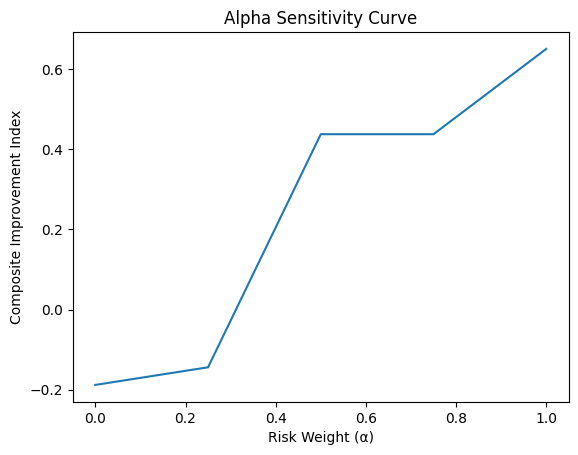

In [11]:
# ------------------ ALPHA SENSITIVITY CURVE ------------------

plt.figure()

grouped = scenarios_df.groupby("risk_weight").mean(numeric_only=True)

plt.plot(grouped.index, grouped["Composite_Index"])
plt.xlabel("Risk Weight (α)")
plt.ylabel("Composite Improvement Index")
plt.title("Alpha Sensitivity Curve")
plt.show()

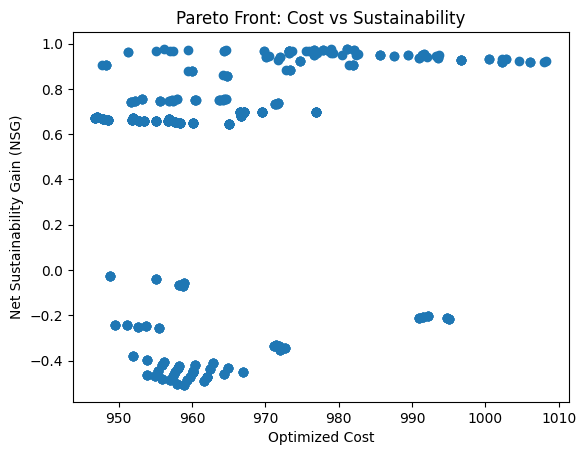

In [12]:
# ------------------ PARETO FRONT ------------------

plt.figure()

plt.scatter(
    scenarios_df["optimized_cost"],
    scenarios_df["NSG"]
)

plt.xlabel("Optimized Cost")
plt.ylabel("Net Sustainability Gain (NSG)")
plt.title("Pareto Front: Cost vs Sustainability")
plt.show()

In [13]:
# ------------------ GENERATE PAPER TABLE ------------------

paper_table = scenarios_df[[
    "volume",
    "risk_weight",
    "max_share",
    "min_supplier",
    "optimized_cost",
    "optimized_emissions",
    "optimized_deforestation",
    "Composite_Index",
    "NSG"
]].copy()

paper_table = paper_table.sort_values("Composite_Index", ascending=False)

print("\nTop 10 Scenarios by Composite Index:\n")
print(paper_table.head(10).round(4))


Top 10 Scenarios by Composite Index:

     volume  risk_weight  max_share  min_supplier  optimized_cost  \
105   50000          1.0        0.4             3        956.2175   
106   50000          1.0        0.4             5        959.4017   
245  100000          1.0        0.7             3        978.9273   
110   50000          1.0        0.5             3        981.1444   
120   50000          1.0        0.7             3        981.1444   
115   50000          1.0        0.6             3        981.1444   
107   50000          1.0        0.4             7        964.5884   
100   50000          1.0        0.3             3        957.3793   
109   50000          1.0        0.4            11        964.3409   
108   50000          1.0        0.4             9        964.3409   

     optimized_emissions  optimized_deforestation  Composite_Index     NSG  
105               0.0748                      0.0           0.6943  0.9763  
106               0.0874                      0

In [14]:
# ================= HYPERVOLUME METRIC =================

import numpy as np

# We maximize sustainability (NSG) and minimize cost
# For hypervolume, we convert to maximization problem:
#   maximize NSG
#   maximize (-cost)

data = scenarios_df.copy()

# Normalize objectives for stability
cost_norm = (data["optimized_cost"] - data["optimized_cost"].min()) / \
            (data["optimized_cost"].max() - data["optimized_cost"].min() + 1e-9)

nsg_norm = (data["NSG"] - data["NSG"].min()) / \
           (data["NSG"].max() - data["NSG"].min() + 1e-9)

# Convert cost to maximization
obj1 = 1 - cost_norm
obj2 = nsg_norm

points = np.column_stack([obj1, obj2])

# Reference point (worst case)
ref = np.array([0, 0])

# Simple 2D hypervolume approximation
points = points[np.argsort(points[:, 0])]  # sort by obj1

hv = 0
prev_x = 0

for x, y in points:
    width = x - prev_x
    height = y
    hv += width * height
    prev_x = x

print("\n🏆 Hypervolume Indicator:", round(hv, 6))


🏆 Hypervolume Indicator: 0.756232


In [15]:
# ================= PARETO DOMINANCE CHECK =================

def dominates(a_cost, a_nsg, b_cost, b_nsg):
    return (a_cost <= b_cost and a_nsg >= b_nsg) and \
           (a_cost < b_cost or a_nsg > b_nsg)

static_df = scenarios_df[scenarios_df["risk_weight"] == 0].copy()

fcm_df = scenarios_df[scenarios_df["risk_weight"] == 1].copy()

dominance_count = 0
total = min(len(static_df), len(fcm_df))

for i in range(total):
    if dominates(
        fcm_df.iloc[i]["optimized_cost"],
        fcm_df.iloc[i]["NSG"],
        static_df.iloc[i]["optimized_cost"],
        static_df.iloc[i]["NSG"]
    ):
        dominance_count += 1

print("\n🥇 Pareto Dominance Rate:", 
      round(dominance_count / total, 3))


🥇 Pareto Dominance Rate: 0.248


In [16]:
# ================= ALPHA MONOTONICITY =================

grouped = scenarios_df.groupby("risk_weight")["NSG"].mean()

alpha_values = grouped.index.values
nsg_values = grouped.values

monotonic = np.all(np.diff(nsg_values) >= -1e-6)

print("\n📈 Alpha Monotonic Sustainability:", monotonic)

if monotonic:
    print("✅ Sustainability increases consistently with α")
else:
    print("⚠️ Minor non-monotonic behavior detected")


📈 Alpha Monotonic Sustainability: True
✅ Sustainability increases consistently with α


In [18]:
# ================= REBUILD STATIC BASELINE FOR ALL SCENARIOS =================

from tqdm import tqdm

static_metrics = []

for _, row in scenarios_df.iterrows():
    
    volume = row["volume"]
    max_share = row["max_share"]
    min_supplier = row["min_supplier"]
    
    # Run static model
    static_alloc = static_entropy_baseline(df_full, volume, max_share)
    
    def compute_metrics(df, alloc):
        cost = np.dot(df['avg_cost_per_tonne'], alloc) / alloc.sum()
        em = np.dot(df['avg_emissions_kpi'], alloc) / alloc.sum()
        de = np.dot(df['avg_deforestation_kpi'], alloc) / alloc.sum()
        return cost, em, de
    
    s_cost, s_em, s_def = compute_metrics(df_full, static_alloc)
    
    static_metrics.append((s_cost, s_em, s_def))

static_metrics = np.array(static_metrics)

scenarios_df["static_cost"] = static_metrics[:,0]
scenarios_df["static_emissions"] = static_metrics[:,1]
scenarios_df["static_deforestation"] = static_metrics[:,2]

In [20]:
def percent_change(old, new):
    return (old - new) / (old + 1e-9)

# Static composite
static_cost_imp = percent_change(
    scenarios_df["baseline_cost"],
    scenarios_df["static_cost"]
)

static_em_imp = percent_change(
    scenarios_df["baseline_emissions"],
    scenarios_df["static_emissions"]
)

static_def_imp = percent_change(
    scenarios_df["baseline_deforestation"],
    scenarios_df["static_deforestation"]
)

scenarios_df["static_composite"] = (
    0.3 * static_cost_imp +
    0.5 * static_em_imp +
    0.2 * static_def_imp
)

# FCM composite already computed earlier
# If not:
fcm_cost_imp = percent_change(
    scenarios_df["baseline_cost"],
    scenarios_df["optimized_cost"]
)

fcm_em_imp = percent_change(
    scenarios_df["baseline_emissions"],
    scenarios_df["optimized_emissions"]
)

fcm_def_imp = percent_change(
    scenarios_df["baseline_deforestation"],
    scenarios_df["optimized_deforestation"]
)

scenarios_df["fcm_composite"] = (
    0.3 * fcm_cost_imp +
    0.5 * fcm_em_imp +
    0.2 * fcm_def_imp
)

In [21]:
from scipy.stats import ttest_rel
import numpy as np

# Assume you have arrays of composite scores
static_scores = scenarios_df['static_composite'].values
fcm_scores = scenarios_df['fcm_composite'].values

# Paired t-test
t_stat, p_value = ttest_rel(fcm_scores, static_scores)

print("Paired t-test Results")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("✅ FCM significantly outperforms Static model (p < 0.05)")
else:
    print("⚠ No significant difference detected")

Paired t-test Results
t-statistic: 37.27664355119137
p-value: 7.012108574783527e-161
✅ FCM significantly outperforms Static model (p < 0.05)
